# Introduction- Smoothing

Both datasets used in this section of the project contain events which are labelled as having a probability equal to zero. Such a statement carries the inferrence that these events are impossible, whereas the reality is that they are much more likely to be rare, or unseen within the observed data. The assignment of zero-probabilities to these events gives rise to limitations to any inferential statistics, machine learning work etc. carries out using this data. For example in the case of machine learning, zero probabilities are problematic as any implication that certain events are impossible leads to bias in estimations to more common events, poor generalisation (overfitting) and thus invalid outputs. 

Techniques to assign probabilities to such unseen events, known as smoothing vary depending on the context and characteristics of the data in question, however in all cases it is important to monitor the effects of smoothing on the data to ensure that the data still retains important patterns essential to understanding the behaviours or patterns being studied. The below work aims to evaluate potential appropriate smoothing methods for the two relevant datasets and identify the optimal choices in both cases. For both datasets, it is important to retain the overall distribution of assignments of emotions or polarities so as to not introduce more noise into the raw data than is necessary. The primary method to evaluate this will be the use of kernal density plots. 

The purpose of this work is to narrow down potential options which may be ideal for use in later aspects of the project for example machine learning models to expand upon the available data prior to commencing sarcasm detection. Options determined to be reasonably viable may be tested during model optimisation to identify the case that provides the best outcomes for the purpose in question. This will be an iterative process where this work is available to refer back to during model optimisation. 

# Dataset background

Basic emotional theory: The dataset to be used for this work is the EmoTag1200 dataset. This dataset contains relative probability values for 8 basic emotions, however in many cases the estimated probability for some emotions is zero. In this case the distribution of affinity to each emotion will be an important metric. The evaluated methods will be a Laplace Estimator, Good Turing Estimator and Absolute Discounting. In each case, parameters will be optimised and the best outcomes in each case will be compared to the original data in terms of distribution via a kernal density plot. 

# Basic Theory- Laplace Estimator

Laplace smoothing is one such technique which adds a small constant value to each count in order to estimate probabilities. The method ensures no zero-probabilities and preserves the relative order of probabilities however the smoothing parameter can introduce bias as it shifts probabilities away from the observed events to estimate unseen events in order to preserve a total probability as 100%. This method ensures non-zero probabilities which is a key reason for smoothing in this case, however if parameters are not tuned correctly it is prone to over smoothing and the nuance of the data can be lost. This section will optimise the parameters for use of this estimator and identify the best outcome to be compared to the other methods under consideration. 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from numpy import log
import plotly.express as px

In [12]:
#Importing data
df = pd.read_csv("Combined_Emot_Data.csv")

#Create a column that adds the total values for all basic emotions
df['total'] = df['anger'] + df['anticipation'] + df['disgust'] + df['fear'] + df['joy'] + df['sadness'] + df['surprise'] + df['trust']

In [3]:
#Check df
df.head()

unicode emoji           name  anger  anticipation  disgust  fear   joy  \
0   1F308     🌈        rainbow   0.00          0.28     0.00  0.00  0.69   
1   1F319     🌙  crescent moon   0.00          0.31     0.00  0.00  0.25   
2   1F31A     🌚  new moon face   0.06          0.08     0.17  0.06  0.42   
3   1F31E     🌞  sun with face   0.00          0.22     0.00  0.00  0.78   
4   1F31F     🌟   glowing star   0.00          0.28     0.00  0.00  0.53   

   sadness  surprise  trust  total  
0     0.06      0.22   0.33   1.58  
1     0.00      0.06   0.25   0.87  
2     0.19      0.06   0.11   1.15  
3     0.00      0.11   0.22   1.33  
4     0.00      0.25   0.31   1.37

In [4]:
#Create a list of basic emotions
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

The following work aims to perform Laplace smoothing, with varying additive values in the numerator. Smoothing will be performed with varying values between 0.001 and 2, where larger values result in greater smoothing which would increase models robustness to noise, reduce overfitting and is better in cases where data is sparse. However greater smoothing increases uniformity across categories reducing its capacity to identify subtle patterns within the data. The converse is true for lesser degrees of smoothing.

In [13]:
#Make a copy of the dataframe
df_le2 = df.copy()

#Apply Laplace smoothing with additive value of 1
for emotion in emotions:
    df_le2[emotion] = (df_le2[emotion] + 2) / (df_le2["total"] + 8)

df_le2.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.208768      0.237996  0.208768  0.208768  0.280793   
1   1F319     🌙  0.225479      0.260428  0.225479  0.225479  0.253664   
2   1F31A     🌚  0.225137      0.227322  0.237158  0.225137  0.264481   
3   1F31E     🌞  0.214362      0.237942  0.214362  0.214362  0.297964   
4   1F31F     🌟  0.213447      0.243330  0.213447  0.213447  0.270011   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.215031  0.231733  0.243215  ...  0.582418  0.065934  0.351648   
1  0.225479  0.232244  0.253664  ...  0.655738  0.065574  0.278689   
2  0.239344  0.225137  0.230601  ...  0.622517  0.158940  0.218543   
3  0.214362  0.226152  0.237942  ...  0.581818  0.024242  0.393939   
4  0.213447  0.240128  0.246531  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [14]:
#Make a copy of the dataframe
df_le1 = df.copy()

#Apply Laplace smoothing with additive value of 1
for emotion in emotions:
    df_le1[emotion] = (df_le1[emotion] + 1) / (df_le1["total"] + 8)

df_le1.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.104384      0.133612  0.104384  0.104384  0.176409   
1   1F319     🌙  0.112740      0.147689  0.112740  0.112740  0.140924   
2   1F31A     🌚  0.115847      0.118033  0.127869  0.115847  0.155191   
3   1F31E     🌞  0.107181      0.130761  0.107181  0.107181  0.190782   
4   1F31F     🌟  0.106724      0.136606  0.106724  0.106724  0.163287   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.110647  0.127349  0.138831  ...  0.582418  0.065934  0.351648   
1  0.112740  0.119504  0.140924  ...  0.655738  0.065574  0.278689   
2  0.130055  0.115847  0.121311  ...  0.622517  0.158940  0.218543   
3  0.107181  0.118971  0.130761  ...  0.581818  0.024242  0.393939   
4  0.106724  0.133404  0.139808  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [15]:
#Make a copy of the dataframe
df_le05 = df.copy()

#Apply Laplace smoothing with additive value of 0.5
for emotion in emotions:
    df_le05[emotion] = (df_le05[emotion] + 0.5) / (df_le05["total"] + 8)

df_le05.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.052192      0.081420  0.052192  0.052192  0.124217   
1   1F319     🌙  0.056370      0.091319  0.056370  0.056370  0.084555   
2   1F31A     🌚  0.061202      0.063388  0.073224  0.061202  0.100546   
3   1F31E     🌞  0.053591      0.077170  0.053591  0.053591  0.137192   
4   1F31F     🌟  0.053362      0.083244  0.053362  0.053362  0.109925   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.058455  0.075157  0.086639  ...  0.582418  0.065934  0.351648   
1  0.056370  0.063134  0.084555  ...  0.655738  0.065574  0.278689   
2  0.075410  0.061202  0.066667  ...  0.622517  0.158940  0.218543   
3  0.053591  0.065380  0.077170  ...  0.581818  0.024242  0.393939   
4  0.053362  0.080043  0.086446  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [16]:
#Make a copy of the dataframe
df_le01 = df.copy()

#Apply Laplace smoothing with additive value of 0.1
for emotion in emotions:
    df_le01[emotion] = (df_le01[emotion] + 0.1) / (df_le01["total"] + 8)

df_le01.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.010438      0.039666  0.010438  0.010438  0.082463   
1   1F319     🌙  0.011274      0.046223  0.011274  0.011274  0.039459   
2   1F31A     🌚  0.017486      0.019672  0.029508  0.017486  0.056831   
3   1F31E     🌞  0.010718      0.034298  0.010718  0.010718  0.094319   
4   1F31F     🌟  0.010672      0.040555  0.010672  0.010672  0.067236   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.016701  0.033403  0.044885  ...  0.582418  0.065934  0.351648   
1  0.011274  0.018038  0.039459  ...  0.655738  0.065574  0.278689   
2  0.031694  0.017486  0.022951  ...  0.622517  0.158940  0.218543   
3  0.010718  0.022508  0.034298  ...  0.581818  0.024242  0.393939   
4  0.010672  0.037353  0.043757  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [17]:
#Make a copy of the dataframe
df_le001 = df.copy()

#Apply Laplace smoothing with additive value of 0.01
for emotion in emotions:
    df_le001[emotion] = (df_le001[emotion] + 0.01) / (df_le001["total"] + 8)

df_le001.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.001044      0.030271  0.001044  0.001044  0.073069   
1   1F319     🌙  0.001127      0.036077  0.001127  0.001127  0.029312   
2   1F31A     🌚  0.007650      0.009836  0.019672  0.007650  0.046995   
3   1F31E     🌞  0.001072      0.024652  0.001072  0.001072  0.084673   
4   1F31F     🌟  0.001067      0.030950  0.001067  0.001067  0.057631   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.007307  0.024008  0.035491  ...  0.582418  0.065934  0.351648   
1  0.001127  0.007892  0.029312  ...  0.655738  0.065574  0.278689   
2  0.021858  0.007650  0.013115  ...  0.622517  0.158940  0.218543   
3  0.001072  0.012862  0.024652  ...  0.581818  0.024242  0.393939   
4  0.001067  0.027748  0.034152  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [18]:
#Make a copy of the dataframe
df_le0001 = df.copy()

#Apply Laplace smoothing with additive value of 0.001
for emotion in emotions:
    df_le0001[emotion] = (df_le0001[emotion] + 0.001) / (df_le0001["total"] + 8)

df_le0001.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.000104      0.029332  0.000104  0.000104  0.072129   
1   1F319     🌙  0.000113      0.035062  0.000113  0.000113  0.028298   
2   1F31A     🌚  0.006667      0.008852  0.018689  0.006667  0.046011   
3   1F31E     🌞  0.000107      0.023687  0.000107  0.000107  0.083708   
4   1F31F     🌟  0.000107      0.029989  0.000107  0.000107  0.056670   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.006367  0.023069  0.034551  ...  0.582418  0.065934  0.351648   
1  0.000113  0.006877  0.028298  ...  0.655738  0.065574  0.278689   
2  0.020874  0.006667  0.012131  ...  0.622517  0.158940  0.218543   
3  0.000107  0.011897  0.023687  ...  0.581818  0.024242  0.393939   
4  0.000107  0.026788  0.033191  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

Below are kernal density plots displaying the results of the smoothing, broken down by emotions. For all emotions, regardless of additive value, the shape of the data is significantly altered from the original. Peaks representing smoothed data are sharper with significantly lesser peak widths. This implies the result of these tests is yielding data which is over-generalised and thus would not be useful to identify nuances between emojis themselves. To some degree this may be due to the definition of the 'k' value (cardinality) which was defined as k=8 as while smoothing was applied by column, the fundamental basis of basic emotional theory is that while emotions are often experienced together, a single basic emotion can be applied in each scenario. By this logic, k=8 is a reasonable assumption as an experience of the basic emotion 'disgust' for example, will likely ilicit a greater secondary association with 'fear' and 'anger' and to a much lesser extent 'joy'. Thus the 8 classifications would be a reasonable definition for cardinality. In practice, this does not appear to apply to the data. Another test utilising k=1, as the data is being smoothed column-wise will be performed. 

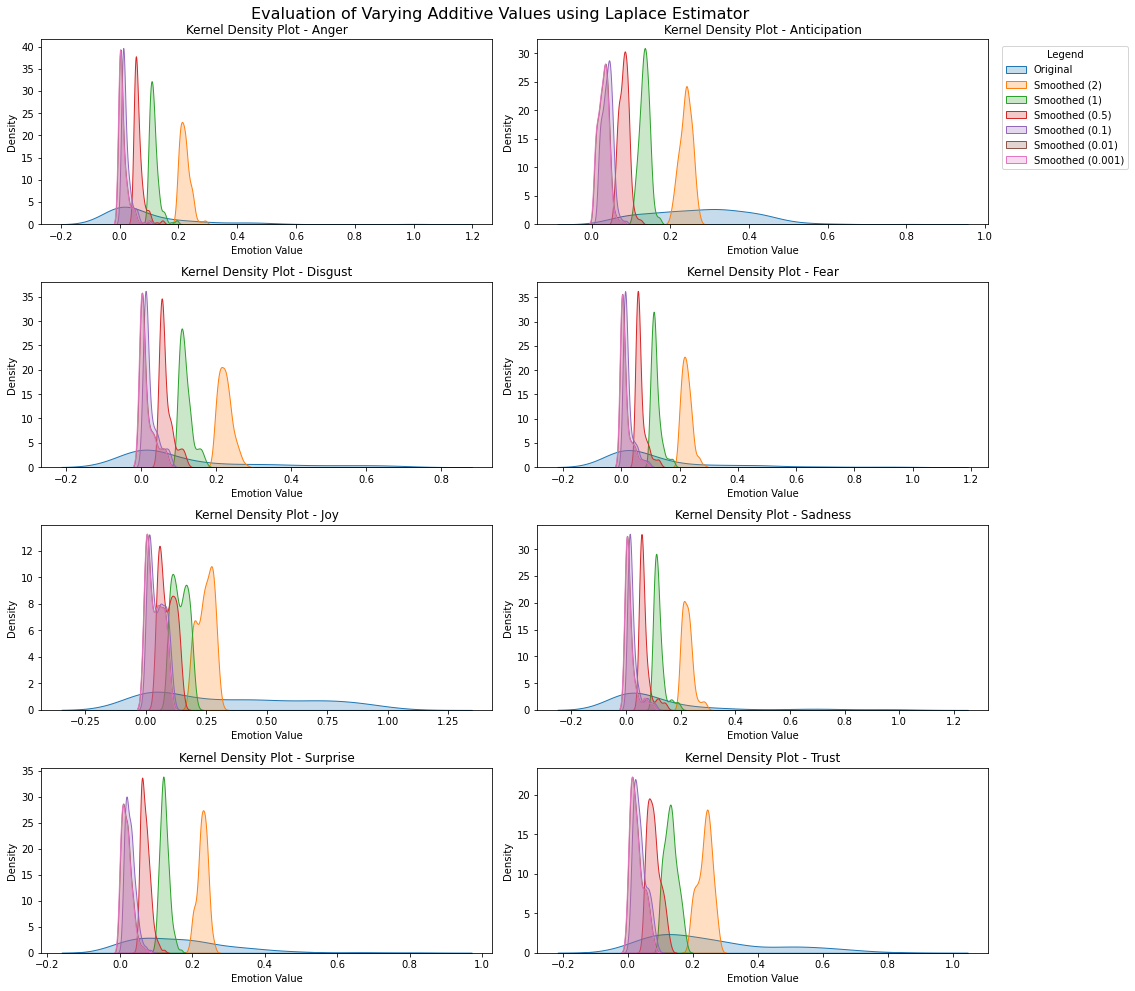

In [19]:
#Create list of emotions
emotion_columns = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le2[emotion_column], label="Smoothed (2)", shade=True, ax=ax)
    sns.kdeplot(data=df_le1[emotion_column], label="Smoothed (1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le05[emotion_column], label="Smoothed (0.5)", shade=True, ax=ax)
    sns.kdeplot(data=df_le01[emotion_column], label="Smoothed (0.1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le001[emotion_column], label="Smoothed (0.01)", shade=True, ax=ax)
    sns.kdeplot(data=df_le0001[emotion_column], label="Smoothed (0.001)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

In [20]:
#Try again with k=1

#Create a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Apply smoothing with varying parameters
df_le2 = df.copy()
for emotion in emotions:
    df_le2[emotion] = (df_le2[emotion] + 2) / (df_le2["total"] + 1)

df_le1 = df.copy()
for emotion in emotions:
    df_le1[emotion] = (df_le1[emotion] + 1) / (df_le1["total"] + 1)
    
df_le05 = df.copy()
for emotion in emotions:
    df_le05[emotion] = (df_le05[emotion] + 0.5) / (df_le05["total"] + 1)
    
df_le01 = df.copy()
for emotion in emotions:
    df_le01[emotion] = (df_le01[emotion] + 0.1) / (df_le01["total"] + 1)
    
df_le001 = df.copy()
for emotion in emotions:
    df_le001[emotion] = (df_le001[emotion] + 0.01) / (df_le001["total"] + 1)
    
df_le0001 = df.copy()
for emotion in emotions:
    df_le0001[emotion] = (df_le0001[emotion] + 0.001) / (df_le0001["total"] + 1)

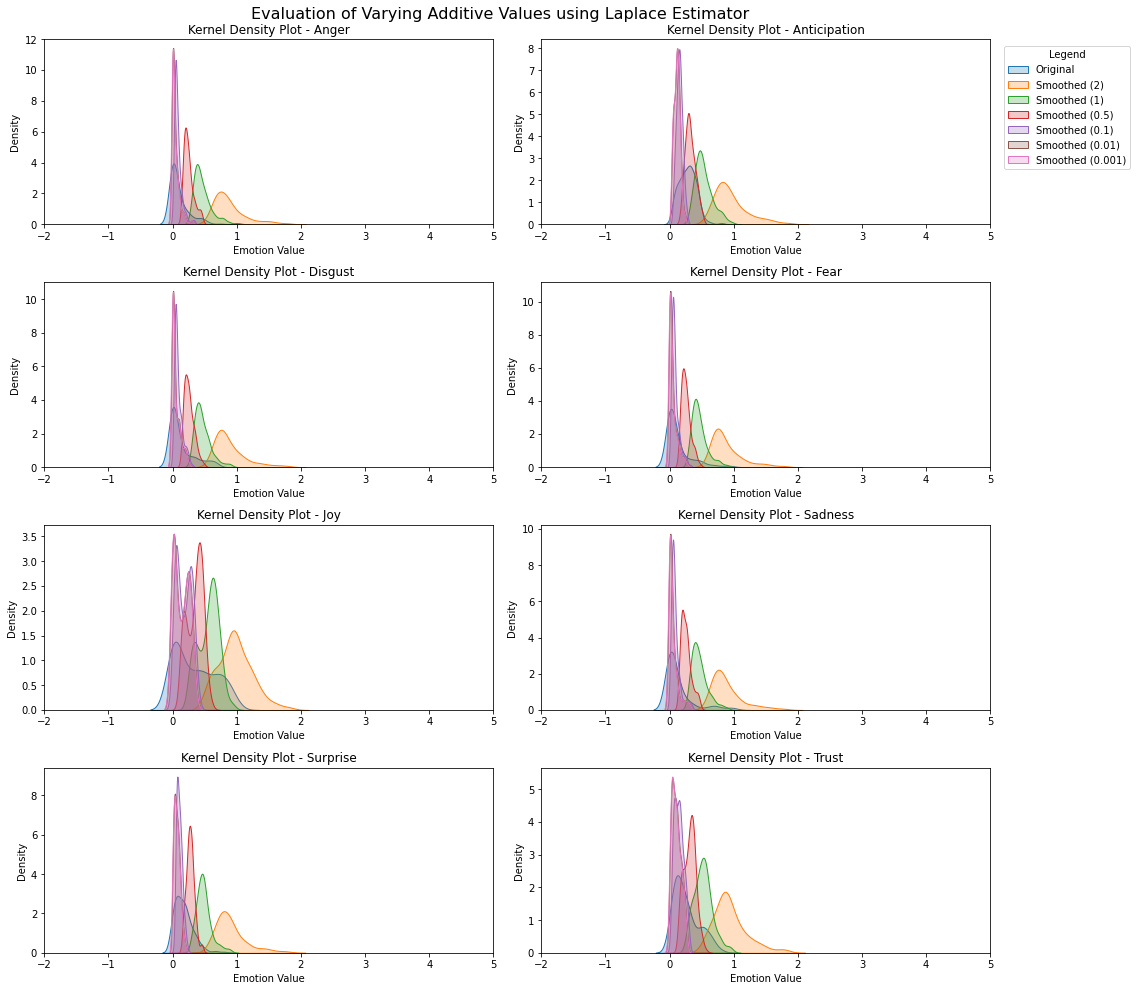

In [21]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le2[emotion_column], label="Smoothed (2)", shade=True, ax=ax)
    sns.kdeplot(data=df_le1[emotion_column], label="Smoothed (1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le05[emotion_column], label="Smoothed (0.5)", shade=True, ax=ax)
    sns.kdeplot(data=df_le01[emotion_column], label="Smoothed (0.1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le001[emotion_column], label="Smoothed (0.01)", shade=True, ax=ax)
    sns.kdeplot(data=df_le0001[emotion_column], label="Smoothed (0.001)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-2, 5)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

The result of the adjusted definition of k improved outcomes with a must less significant decrease in peak width across all emotions, however the results are still not ideal as the smoothing is still compromising the overall variance across emotions in favour of a highly generalised value, which will inhibit the potential to understand the true emotions associated with each emoji, rather than a general overview of an emotion which is more representative of an average and contains no nuance from the specific emoji in question. Another test where k=0 will be carried out.

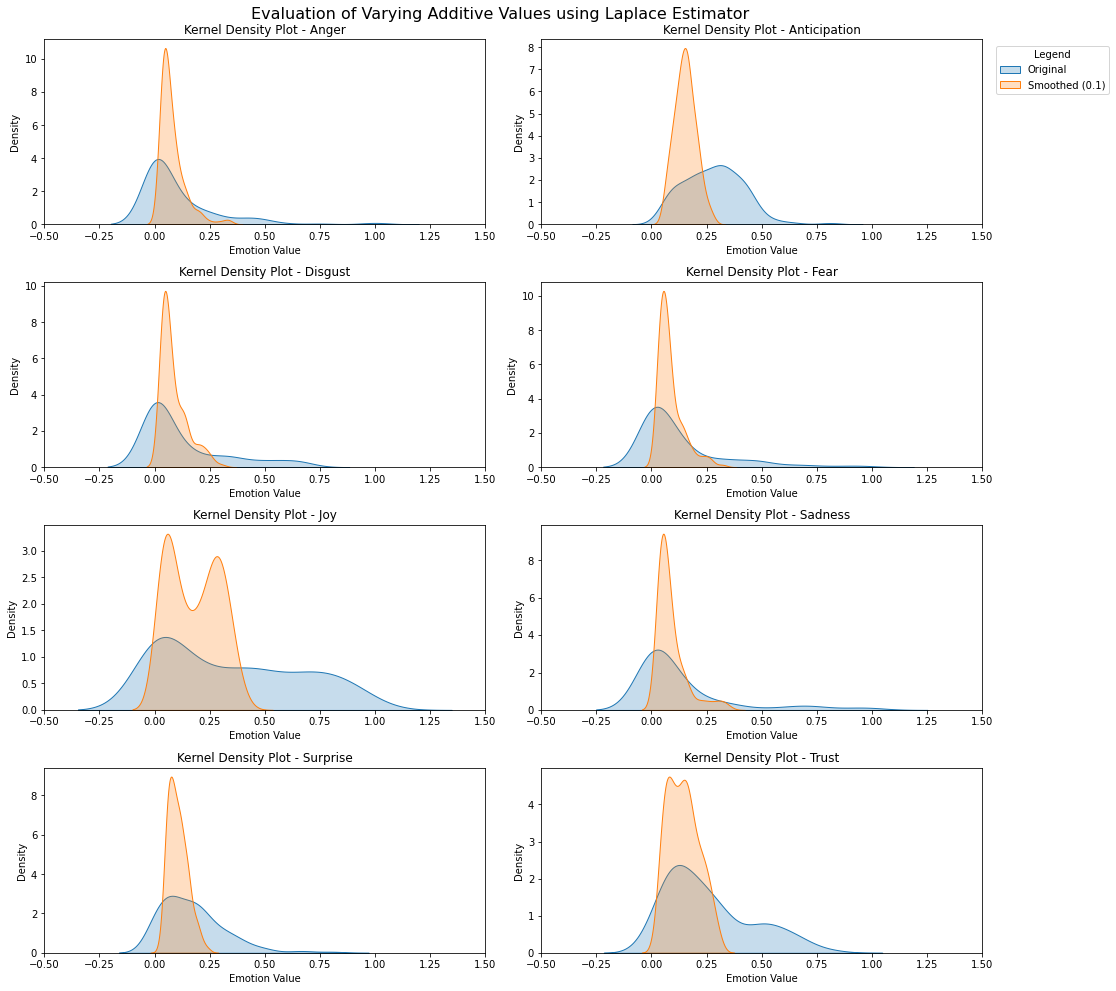

In [22]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le01[emotion_column], label="Smoothed (0.1)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-0.5, 1.5)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

In [23]:
#Try again with k=0
df_le2 = df.copy()
for emotion in emotions:
    df_le2[emotion] = (df_le2[emotion] + 2) / (df_le2["total"])

df_le1 = df.copy()
for emotion in emotions:
    df_le1[emotion] = (df_le1[emotion] + 1) / (df_le1["total"])
    
df_le05 = df.copy()
for emotion in emotions:
    df_le05[emotion] = (df_le05[emotion] + 0.5) / (df_le05["total"])
    
df_le01 = df.copy()
for emotion in emotions:
    df_le01[emotion] = (df_le01[emotion] + 0.1) / (df_le01["total"])
    
df_le001 = df.copy()
for emotion in emotions:
    df_le001[emotion] = (df_le001[emotion] + 0.01) / (df_le001["total"])
    
df_le0001 = df.copy()
for emotion in emotions:
    df_le0001[emotion] = (df_le0001[emotion] + 0.001) / (df_le0001["total"])

Below are the results of tests where k=0 was utilised. The density plots are most aligned with the original data in the optimal case as compared to previous k values assessed. A skew towards greater values is evident in almost universally and an interesting outcome of this test is the smoothed values are adding in outlier values where some emotions are being estimated to have a very high affinity to a particular emotion. As these were not present in the original data this is an unusual outcome and implies that while generalisation may be better using these parameters, it may not be producing ideal results for each emoji. These plots only provide information about the overall patterns which may not convey the entire story.

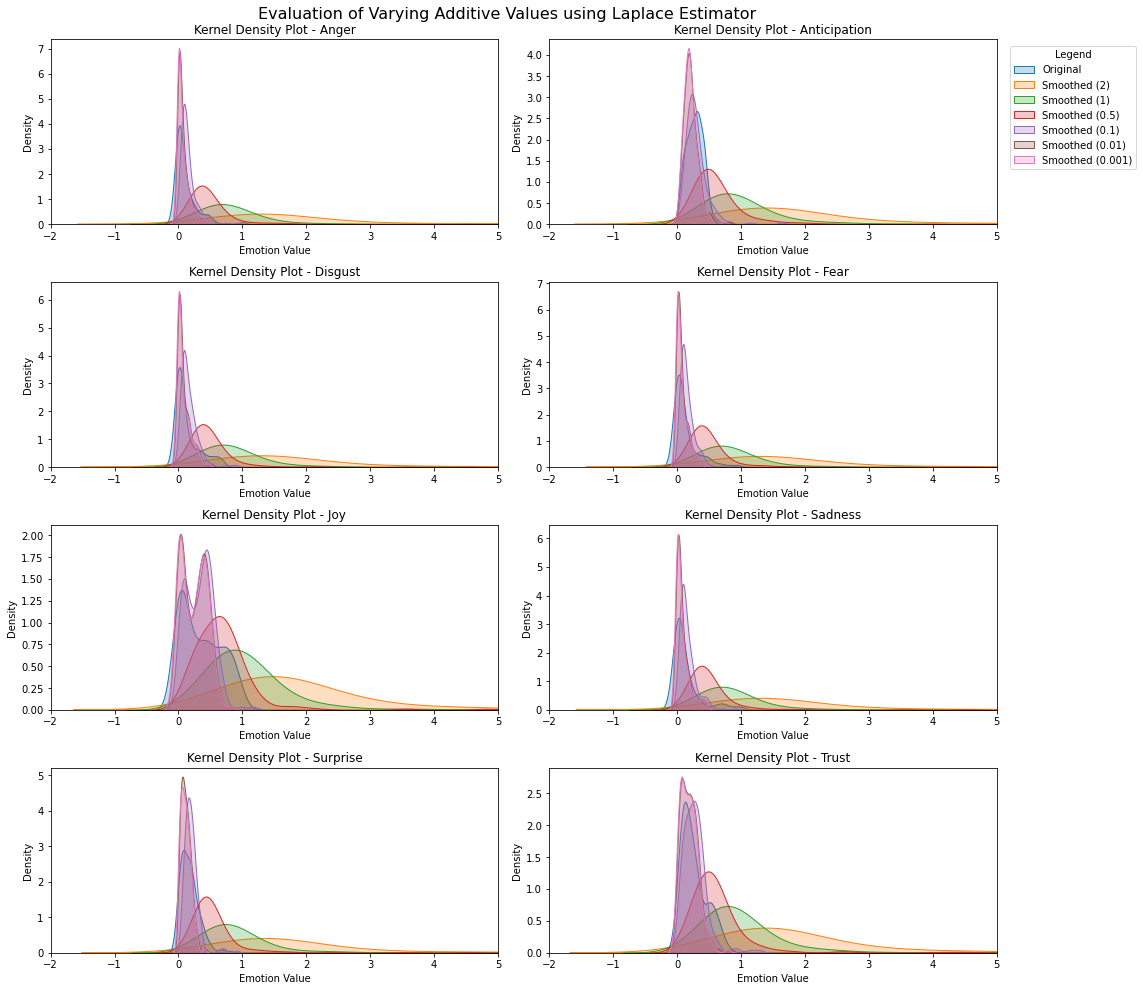

In [24]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le2[emotion_column], label="Smoothed (2)", shade=True, ax=ax)
    sns.kdeplot(data=df_le1[emotion_column], label="Smoothed (1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le05[emotion_column], label="Smoothed (0.5)", shade=True, ax=ax)
    sns.kdeplot(data=df_le01[emotion_column], label="Smoothed (0.1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le001[emotion_column], label="Smoothed (0.01)", shade=True, ax=ax)
    sns.kdeplot(data=df_le0001[emotion_column], label="Smoothed (0.001)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-2, 5)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

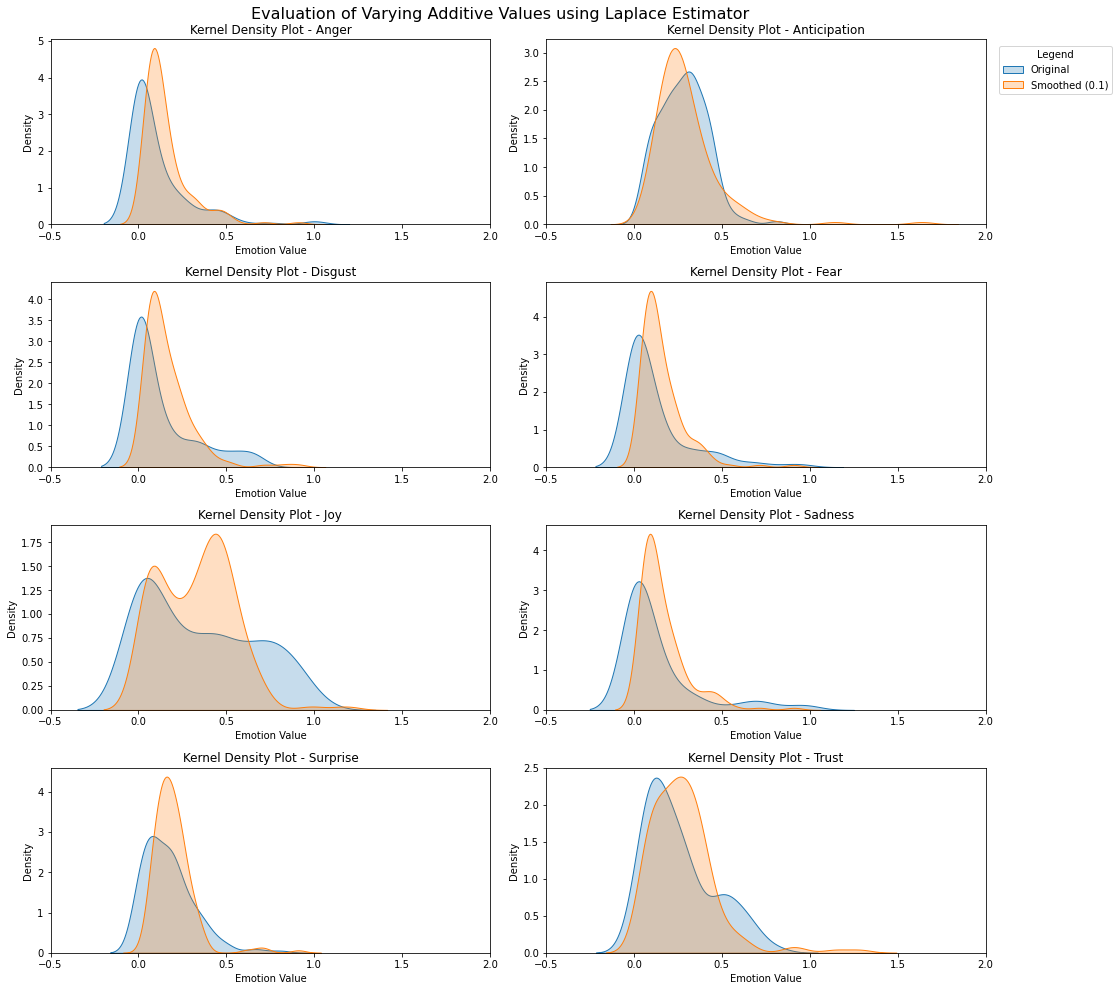

In [25]:
#Remove all but the most ideal smoothing method for comparative purposes

#Create list of emotions
emotion_columns = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le01[emotion_column], label="Smoothed (0.1)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-0.5, 2)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

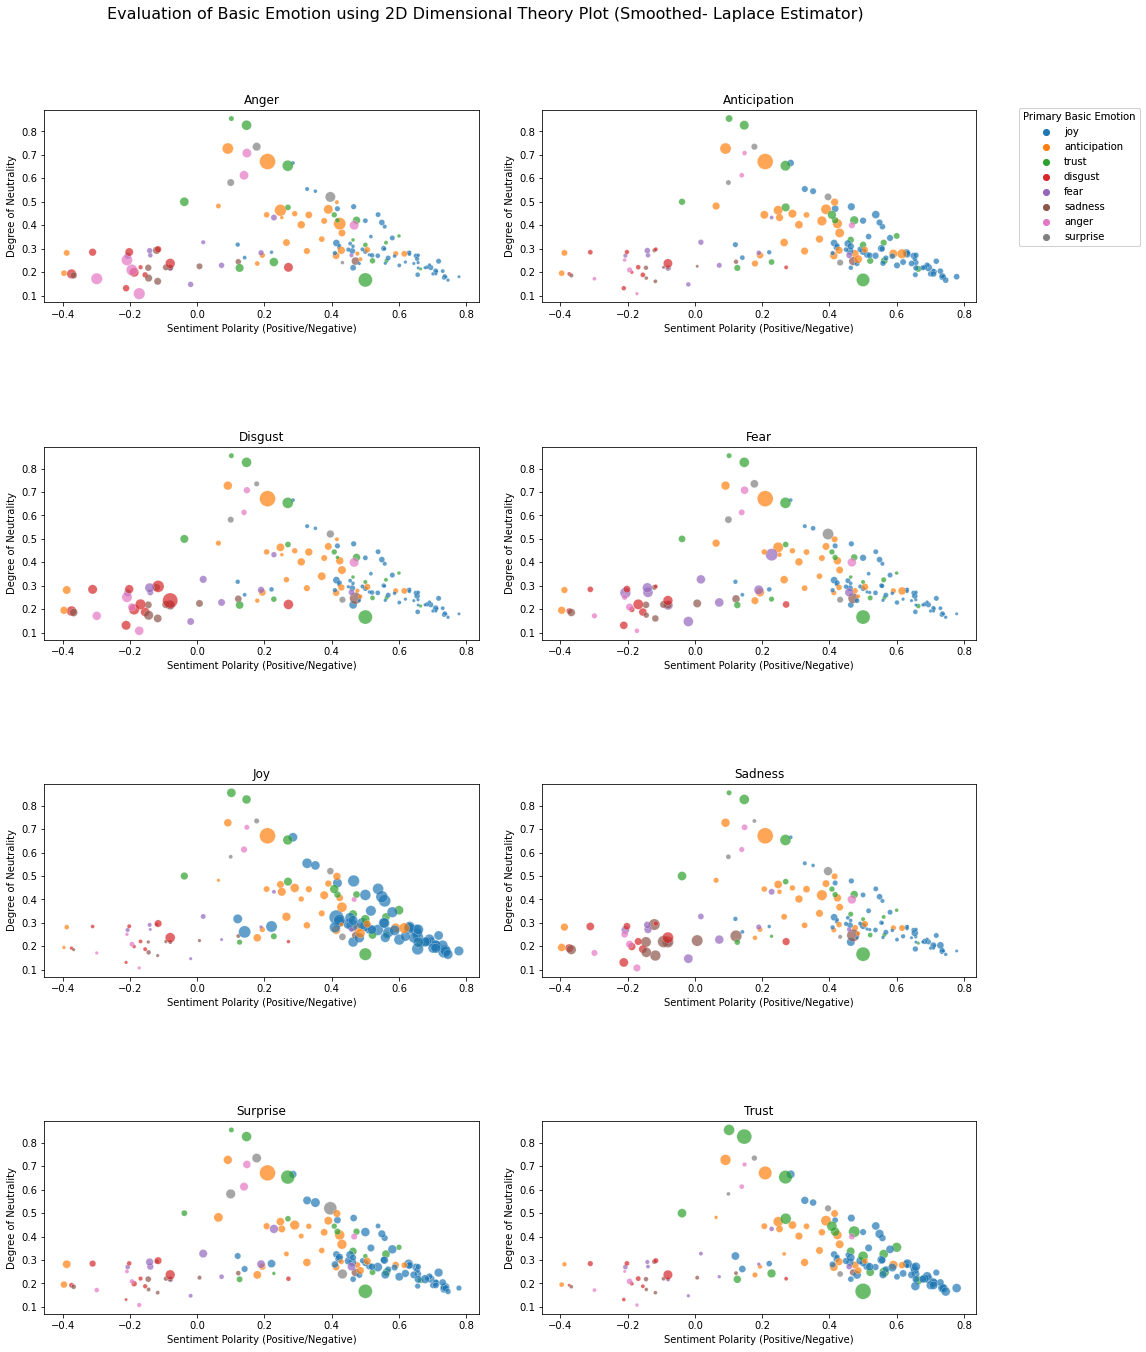

In [28]:
#Compare visualisations from EDA before and after smoothing to understand its impact- 2D Dimensional Theory plot

#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_le01['sent_score']
    y = df_le01['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_le01[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_le01['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion using 2D Dimensional Theory Plot (Smoothed- Laplace Estimator)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Sentiment Polarity (Positive/Negative)')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

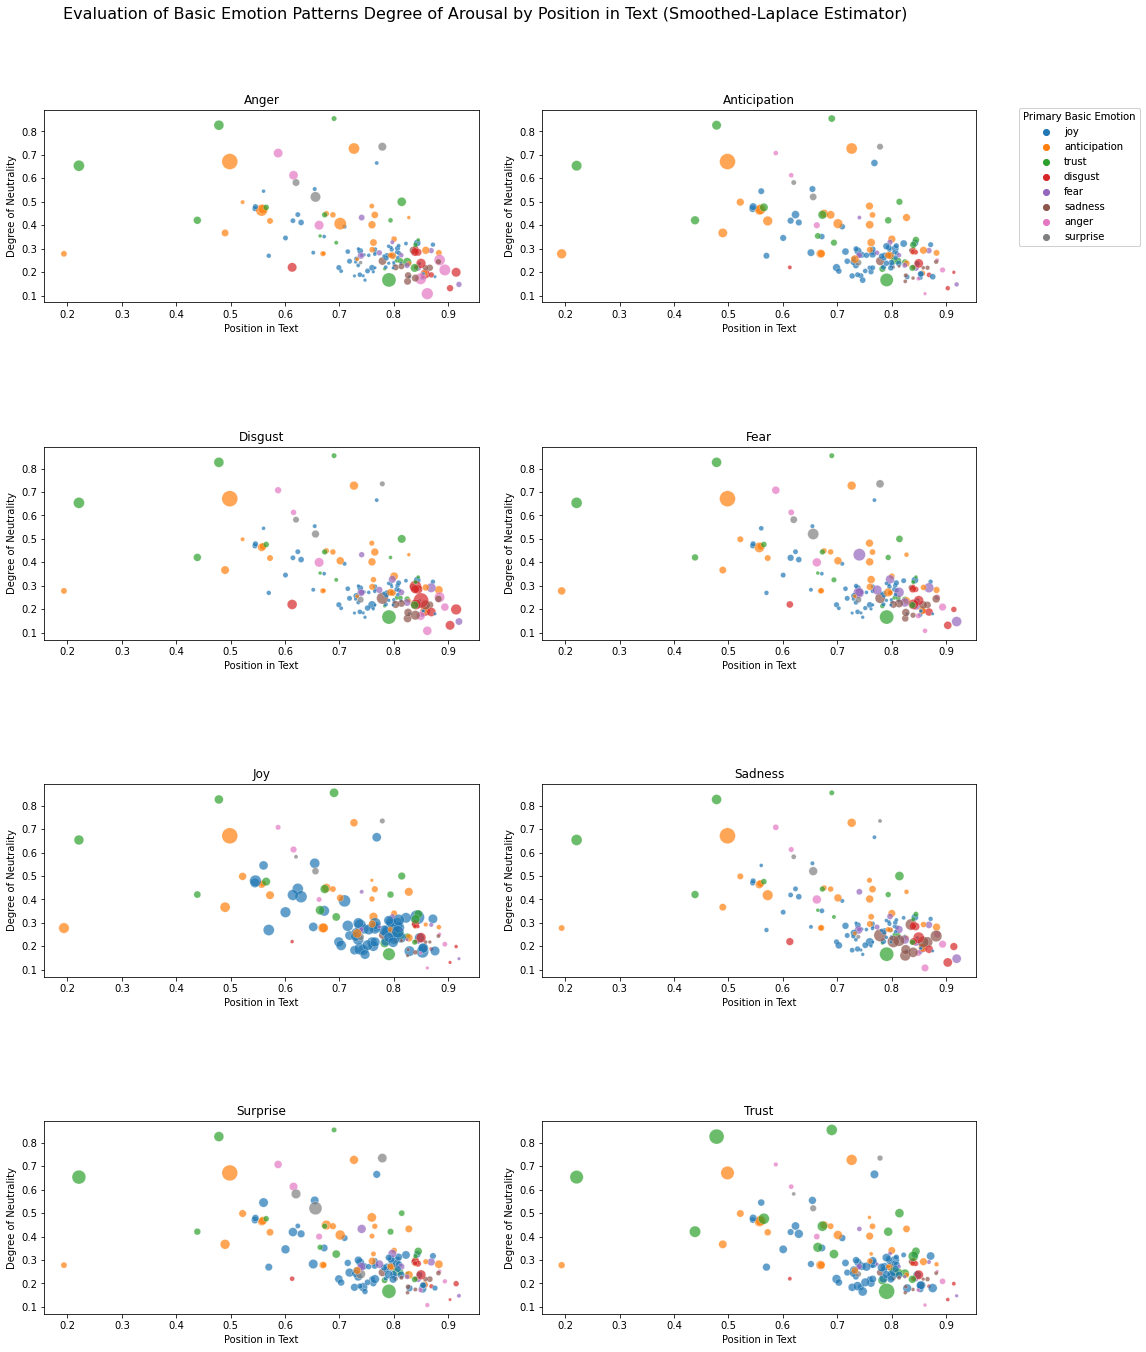

In [30]:
#Compare using the degree of arousal and position of emoji in text plot

#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_le01['Position']
    y = df_le01['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_le01[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_le01['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion Patterns Degree of Arousal by Position in Text (Smoothed-Laplace Estimator)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Position in Text')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color: 
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

# Basic Theory- Good Turing Estimator

Good Turing smoothing is a method which estimates probabilities of unseen events based on frequencies of observed events, aiming to provide a more accurate probability estimate by taking into account the distribution of observed counts. ******

In [31]:
#Create a copy of the DataFrame to store the data
df_gt2 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 2

#Iterate over each row
for idx, row in df_gt2.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt2.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     #Fill NaN values with a default value
    df_gt2.loc[idx, "anger":"trust"] = df_gt2.loc[idx, "anger":"trust"].fillna(1e-6)

#Display the result
df_gt2.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.000001   
1   1F319     🌙  0.084370      0.000001  0.084370  0.084370  0.205440   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.000001   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.000001   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.000001   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [32]:
#Create a copy of the DataFrame to store the data
df_gt5 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 5

#Iterate over each row
for idx, row in df_gt5.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt5.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     #Fill NaN values with a default value
    df_gt5.loc[idx, "anger":"trust"] = df_gt5.loc[idx, "anger":"trust"].fillna(1e-6)

#Display the result
df_gt5.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.000001   
1   1F319     🌙  0.084370      0.000001  0.084370  0.084370  0.205440   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.000001   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.000001   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.000001   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [33]:
#Create a copy of the DataFrame to store the data
df_gt10 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 10

#Iterate over each row
for idx, row in df_gt10.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt10.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     # Fill NaN values with a default value
    df_gt10.loc[idx, "anger":"trust"] = df_gt10.loc[idx, "anger":"trust"].fillna(1e-6)

#Display the result
df_gt10.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.000001   
1   1F319     🌙  0.084370      0.000001  0.084370  0.084370  0.205440   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.000001   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.000001   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.000001   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [34]:
#Create a copy of the DataFrame to store the data
df_gt20 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 20

#Iterate over each row
for idx, row in df_gt20.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt20.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     #Fill NaN values with a default value
    df_gt20.loc[idx, "anger":"trust"] = df_gt20.loc[idx, "anger":"trust"].fillna(1e-6)

#Display the result
df_gt20.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.000001   
1   1F319     🌙  0.084370      0.000001  0.084370  0.084370  0.205440   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.000001   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.000001   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.000001   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

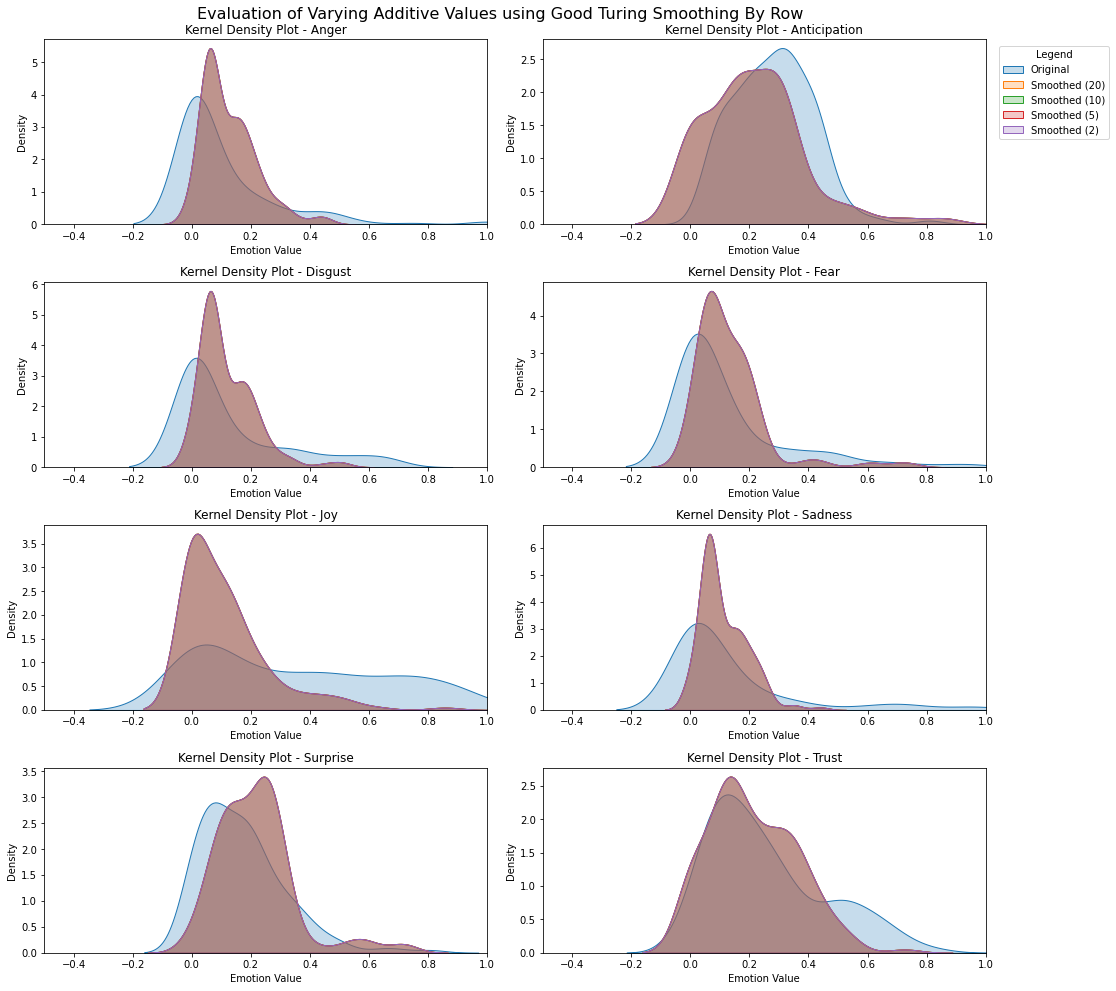

In [35]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_gt20[emotion_column], label="Smoothed (20)", shade=True, ax=ax)
    sns.kdeplot(data=df_gt10[emotion_column], label="Smoothed (10)", shade=True, ax=ax)
    sns.kdeplot(data=df_gt5[emotion_column], label="Smoothed (5)", shade=True, ax=ax)
    sns.kdeplot(data=df_gt2[emotion_column], label="Smoothed (2)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Good Turing Smoothing By Row", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-0.5, 1)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

In [36]:
#Create a copy of the DataFrame to store the data
df_gt6 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 10

#Iterate over each row
for idx, row in df_gt6.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt6.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     #Fill NaN values with a default value
    df_gt6.loc[idx, "anger":"trust"] = df_gt6.loc[idx, "anger":"trust"].fillna(1e-6)

#Display the result
df_gt6.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.000001   
1   1F319     🌙  0.084370      0.000001  0.084370  0.084370  0.205440   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.000001   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.000001   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.000001   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [37]:
#Create a copy of the DataFrame to store the data
df_gt5 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 10

#Iterate over each row
for idx, row in df_gt5.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities 
    df_gt5.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     #Fill NaN values with a default value
    df_gt5.loc[idx, "anger":"trust"] = df_gt5.loc[idx, "anger":"trust"].fillna(1e-5)

#Display the result
df_gt5.head()

unicode emoji     anger  anticipation   disgust      fear      joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.00001   
1   1F319     🌙  0.084370      0.000010  0.084370  0.084370  0.20544   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.00001   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.00001   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.00001   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [38]:
#Create a copy of the DataFrame to store the data
df_gt4 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 10

#Iterate over each row
for idx, row in df_gt4.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities 
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt4.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
    #Fill NaN values with a default value
    df_gt4.loc[idx, "anger":"trust"] = df_gt4.loc[idx, "anger":"trust"].fillna(1e-4)

#Display the result
df_gt4.head()

unicode emoji     anger  anticipation   disgust      fear      joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.00010   
1   1F319     🌙  0.084370      0.000100  0.084370  0.084370  0.20544   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.00010   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.00010   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.00010   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [39]:
#Create a copy of the DataFrame to store the data
df_gt3 = df.copy()

#Set the maximum count for Good-Turing smoothing
max_count = 10

#Iterate over each row
for idx, row in df_gt3.iterrows():
    #Get the emotion values for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and their frequencies
    counts = emotions * row["total"]
    freqs = counts.value_counts(normalize=True).sort_index()

    #Calculate the smoothed probabilities
    smoothed_probs = (freqs.index + 1) * (freqs.shift(-1) / freqs)
    smoothed_probs = smoothed_probs / smoothed_probs.sum()

    #Assign the calculated probabilities
    df_gt3.loc[idx, "anger":"trust"] = counts.map(smoothed_probs.get)
    
     #Fill NaN values with a default value
    df_gt3.loc[idx, "anger":"trust"] = df_gt3.loc[idx, "anger":"trust"].fillna(1e-3)

#Display the result
df_gt3.head()

unicode emoji     anger  anticipation   disgust      fear      joy  \
0   1F308     🌈  0.058077      0.251310  0.058077  0.058077  0.00100   
1   1F319     🌙  0.084370      0.001000  0.084370  0.084370  0.20544   
2   1F31A     🌚  0.071426      0.218889  0.239635  0.071426  0.00100   
3   1F31E     🌞  0.078397      0.202672  0.078397  0.078397  0.00100   
4   1F31F     🌟  0.056808      0.314397  0.056808  0.056808  0.00100   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.190747  0.234793  0.265074  ...  0.582418  0.065934  0.351648   
1  0.084370  0.710190  0.205440  ...  0.655738  0.065574  0.278689   
2  0.244245  0.071426  0.225804  ...  0.622517  0.158940  0.218543   
3  0.078397  0.718931  0.202672  ...  0.581818  0.024242  0.393939   
4  0.056808  0.305058  0.323737  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

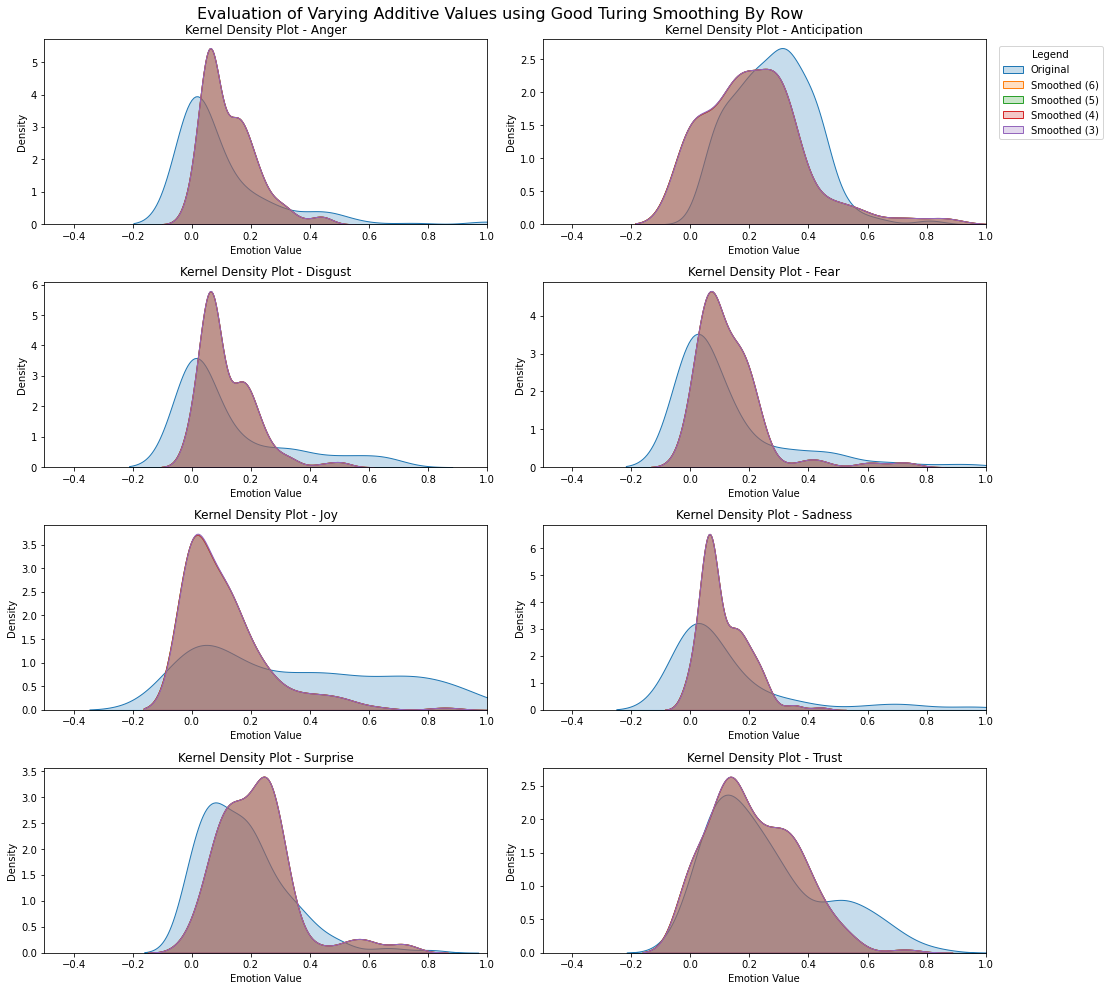

In [40]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_gt6[emotion_column], label="Smoothed (6)", shade=True, ax=ax)
    sns.kdeplot(data=df_gt5[emotion_column], label="Smoothed (5)", shade=True, ax=ax)
    sns.kdeplot(data=df_gt4[emotion_column], label="Smoothed (4)", shade=True, ax=ax)
    sns.kdeplot(data=df_gt3[emotion_column], label="Smoothed (3)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Good Turing Smoothing By Row", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-0.5, 1)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

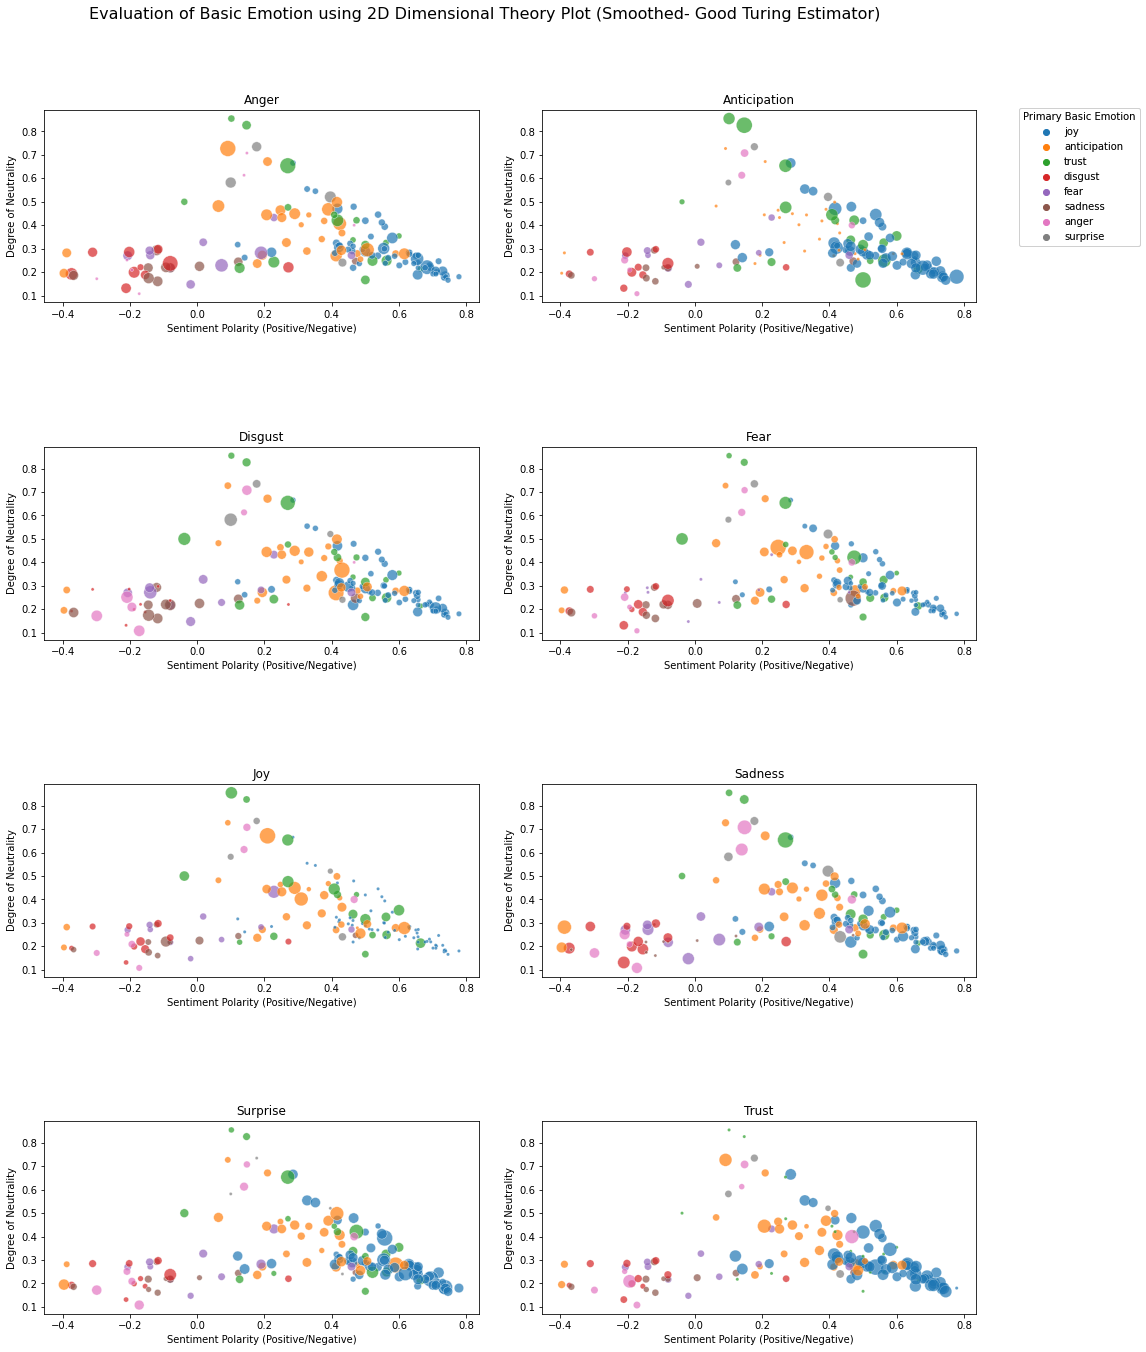

In [42]:
#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_gt3['sent_score']
    y = df_gt3['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_gt3[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_gt3['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion using 2D Dimensional Theory Plot (Smoothed- Good Turing Estimator)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Sentiment Polarity (Positive/Negative)')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  # Only include specified emotions in the legend
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

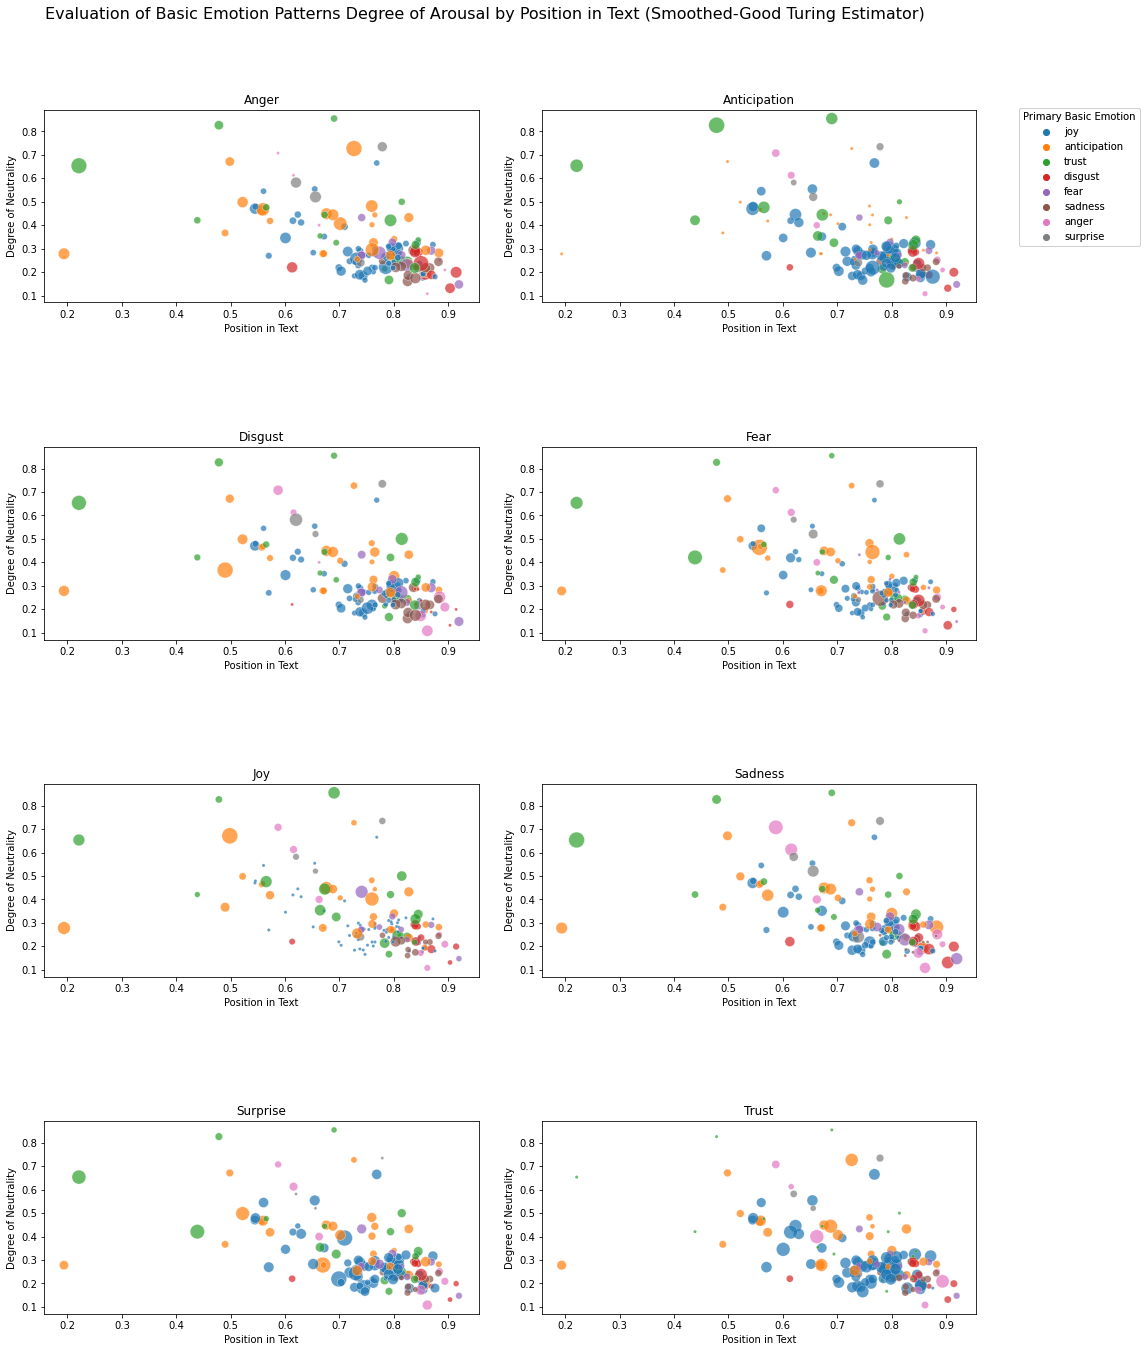

In [43]:
#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_gt3['Position']
    y = df_gt3['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_gt3[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_gt3['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion Patterns Degree of Arousal by Position in Text (Smoothed-Good Turing Estimator)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Position in Text')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  # Only include specified emotions in the legend
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

# Basic Theory- Absolute Discounting

Absolute discounting subtracts a fixed value from each count which is redistributed over the population. This method redistributes probability from higher frequency events to lower frequency ones in addition to ensuring a non-zero probability is achieved in all cases. The following work aims to establish the effects of this smoothing technique on the dataset in question and determine an ideal absolute discounting value. 

In [44]:
df_ad_r2 = df.copy()

#Set the value of the discount parameter
delta = 2

#Iterate over each row
for idx, row in df_ad_r2.iterrows():
    #Get the emotion columns for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and the total count
    counts = emotions * row["total"]
    total_count = row["total"]

    #Calculate the smoothed probabilities using Absolute Discounting
    smoothed_probs = (counts - delta) / total_count + (delta * emotions.nunique()) / total_count

    #Assign the calculated probabilities to the smoothed DataFrame
    df_ad_r2.loc[idx, "anger":"trust"] = smoothed_probs

#Display the result
df_ad_r2.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  6.329114      6.609114  6.329114  6.329114  7.019114   
1   1F319     🌙  6.896552      7.206552  6.896552  6.896552  7.146552   
2   1F31A     🌚  8.755652      8.775652  8.865652  8.755652  9.115652   
3   1F31E     🌞  4.511278      4.731278  4.511278  4.511278  5.291278   
4   1F31F     🌟  5.839416      6.119416  5.839416  5.839416  6.369416   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  6.389114  6.549114  6.659114  ...  0.582418  0.065934  0.351648   
1  6.896552  6.956552  7.146552  ...  0.655738  0.065574  0.278689   
2  8.885652  8.755652  8.805652  ...  0.622517  0.158940  0.218543   
3  4.511278  4.621278  4.731278  ...  0.581818  0.024242  0.393939   
4  5.839416  6.089416  6.149416  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [45]:
df_ad_r1 = df.copy()

#Set the value of the discount parameter
delta = 1

#Iterate over each row
for idx, row in df_ad_r1.iterrows():
    #Get the emotion columns for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and the total count
    counts = emotions * row["total"]
    total_count = row["total"]

    #Calculate the smoothed probabilities using Absolute Discounting
    smoothed_probs = (counts - delta) / total_count + (delta * emotions.nunique()) / total_count

    #Assign the calculated probabilities to the smoothed DataFrame
    df_ad_r1.loc[idx, "anger":"trust"] = smoothed_probs

#Display the result
df_ad_r1.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  3.164557      3.444557  3.164557  3.164557  3.854557   
1   1F319     🌙  3.448276      3.758276  3.448276  3.448276  3.698276   
2   1F31A     🌚  4.407826      4.427826  4.517826  4.407826  4.767826   
3   1F31E     🌞  2.255639      2.475639  2.255639  2.255639  3.035639   
4   1F31F     🌟  2.919708      3.199708  2.919708  2.919708  3.449708   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  3.224557  3.384557  3.494557  ...  0.582418  0.065934  0.351648   
1  3.448276  3.508276  3.698276  ...  0.655738  0.065574  0.278689   
2  4.537826  4.407826  4.457826  ...  0.622517  0.158940  0.218543   
3  2.255639  2.365639  2.475639  ...  0.581818  0.024242  0.393939   
4  2.919708  3.169708  3.229708  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [46]:
df_ad_r05 = df.copy()

#Set the value of the discount parameter
delta = 0.5

#Iterate over each row
for idx, row in df_ad_r05.iterrows():
    #Get the emotion columns for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and the total count
    counts = emotions * row["total"]
    total_count = row["total"]

    #Calculate the smoothed probabilities using Absolute Discounting
    smoothed_probs = (counts - delta) / total_count + (delta * emotions.nunique()) / total_count

    #Assign the calculated probabilities to the smoothed DataFrame
    df_ad_r05.loc[idx, "anger":"trust"] = smoothed_probs

#Display the result
df_ad_r05.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  1.582278      1.862278  1.582278  1.582278  2.272278   
1   1F319     🌙  1.724138      2.034138  1.724138  1.724138  1.974138   
2   1F31A     🌚  2.233913      2.253913  2.343913  2.233913  2.593913   
3   1F31E     🌞  1.127820      1.347820  1.127820  1.127820  1.907820   
4   1F31F     🌟  1.459854      1.739854  1.459854  1.459854  1.989854   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  1.642278  1.802278  1.912278  ...  0.582418  0.065934  0.351648   
1  1.724138  1.784138  1.974138  ...  0.655738  0.065574  0.278689   
2  2.363913  2.233913  2.283913  ...  0.622517  0.158940  0.218543   
3  1.127820  1.237820  1.347820  ...  0.581818  0.024242  0.393939   
4  1.459854  1.709854  1.769854  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [47]:
df_ad_r01 = df.copy()

#Set the value of the discount parameter
delta = 0.1

#Iterate over each row
for idx, row in df_ad_r01.iterrows():
    #Get the emotion columns for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and the total count
    counts = emotions * row["total"]
    total_count = row["total"]

    #Calculate the smoothed probabilities using Absolute Discounting
    smoothed_probs = (counts - delta) / total_count + (delta * emotions.nunique()) / total_count

    #Assign the calculated probabilities to the smoothed DataFrame
    df_ad_r01.loc[idx, "anger":"trust"] = smoothed_probs

#Display the result
df_ad_r01.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.316456      0.596456  0.316456  0.316456  1.006456   
1   1F319     🌙  0.344828      0.654828  0.344828  0.344828  0.594828   
2   1F31A     🌚  0.494783      0.514783  0.604783  0.494783  0.854783   
3   1F31E     🌞  0.225564      0.445564  0.225564  0.225564  1.005564   
4   1F31F     🌟  0.291971      0.571971  0.291971  0.291971  0.821971   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.376456  0.536456  0.646456  ...  0.582418  0.065934  0.351648   
1  0.344828  0.404828  0.594828  ...  0.655738  0.065574  0.278689   
2  0.624783  0.494783  0.544783  ...  0.622517  0.158940  0.218543   
3  0.225564  0.335564  0.445564  ...  0.581818  0.024242  0.393939   
4  0.291971  0.541971  0.601971  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [48]:
df_ad_r001 = df.copy()

#Set the value of the discount parameter
delta = 0.01

#Iterate over each row
for idx, row in df_ad_r001.iterrows():
    #Get the emotion columns for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and the total count
    counts = emotions * row["total"]
    total_count = row["total"]

    #Calculate the smoothed probabilities using Absolute Discounting
    smoothed_probs = (counts - delta) / total_count + (delta * emotions.nunique()) / total_count

    #Assign the calculated probabilities to the smoothed DataFrame
    df_ad_r001.loc[idx, "anger":"trust"] = smoothed_probs

#Display the result
df_ad_r001.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.031646      0.311646  0.031646  0.031646  0.721646   
1   1F319     🌙  0.034483      0.344483  0.034483  0.034483  0.284483   
2   1F31A     🌚  0.103478      0.123478  0.213478  0.103478  0.463478   
3   1F31E     🌞  0.022556      0.242556  0.022556  0.022556  0.802556   
4   1F31F     🌟  0.029197      0.309197  0.029197  0.029197  0.559197   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.091646  0.251646  0.361646  ...  0.582418  0.065934  0.351648   
1  0.034483  0.094483  0.284483  ...  0.655738  0.065574  0.278689   
2  0.233478  0.103478  0.153478  ...  0.622517  0.158940  0.218543   
3  0.022556  0.132556  0.242556  ...  0.581818  0.024242  0.393939   
4  0.029197  0.279197  0.339197  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

In [49]:
df_ad_r0001 = df.copy()

#Set the value of the discount parameter
delta = 0.001

#Iterate over each row
for idx, row in df_ad_r0001.iterrows():
    #Get the emotion columns for the current row
    emotions = row["anger":"trust"]

    #Calculate the observed counts and the total count
    counts = emotions * row["total"]
    total_count = row["total"]

    #Calculate the smoothed probabilities using Absolute Discounting
    smoothed_probs = (counts - delta) / total_count + (delta * emotions.nunique()) / total_count

    #Assign the calculated probabilities to the smoothed DataFrame
    df_ad_r0001.loc[idx, "anger":"trust"] = smoothed_probs

#Display the result
df_ad_r0001.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.003165      0.283165  0.003165  0.003165  0.693165   
1   1F319     🌙  0.003448      0.313448  0.003448  0.003448  0.253448   
2   1F31A     🌚  0.064348      0.084348  0.174348  0.064348  0.424348   
3   1F31E     🌞  0.002256      0.222256  0.002256  0.002256  0.782256   
4   1F31F     🌟  0.002920      0.282920  0.002920  0.002920  0.532920   

    sadness  surprise     trust  ...      le_+      le_-      le_0  \
0  0.063165  0.223165  0.333165  ...  0.582418  0.065934  0.351648   
1  0.003448  0.063448  0.253448  ...  0.655738  0.065574  0.278689   
2  0.194348  0.064348  0.114348  ...  0.622517  0.158940  0.218543   
3  0.002256  0.112256  0.222256  ...  0.581818  0.024242  0.393939   
4  0.002920  0.252920  0.312920  ...  0.386139  0.059406  0.554455   

   sent_score  sent_score_class  upper_error_class lower_error_class  \
0    0.516484          Positive           Positive          Positive   
1    0.590164          Positive           Positive          Positive   
2    0.463576          Positive           Positive          Positive   
3    0.557576          Positive           Positive          Positive   
4    0.326733          Positive           Positive          Positive   

  sent_polar primary_basic_emot total  
0   Positive                joy  1.58  
1   Positive       anticipation  0.87  
2   Positive                joy  1.15  
3   Positive                joy  1.33  
4   Positive                joy  1.37  

[5 rows x 22 columns]

The results of this method shows a preservation of the shape of the data at lower discount values- an intuitive outcome while totally addressing the presence of zero-probabilities in the data. However the smallest discount value may not necessarily be the optimal outcome when other tests during machine learning are considered. This test applies constant values to all zero-probabilities which may impede any algorithms ability to obtain nuance from emojis where zero probabilities were present, additionally increased smoothing at higher discount values may improve generalisation. What is clear is that high discount values (>0.5) have a very significant skew on the data and are unsuitable as they do not preserve any patterns originally present within the dataset. 

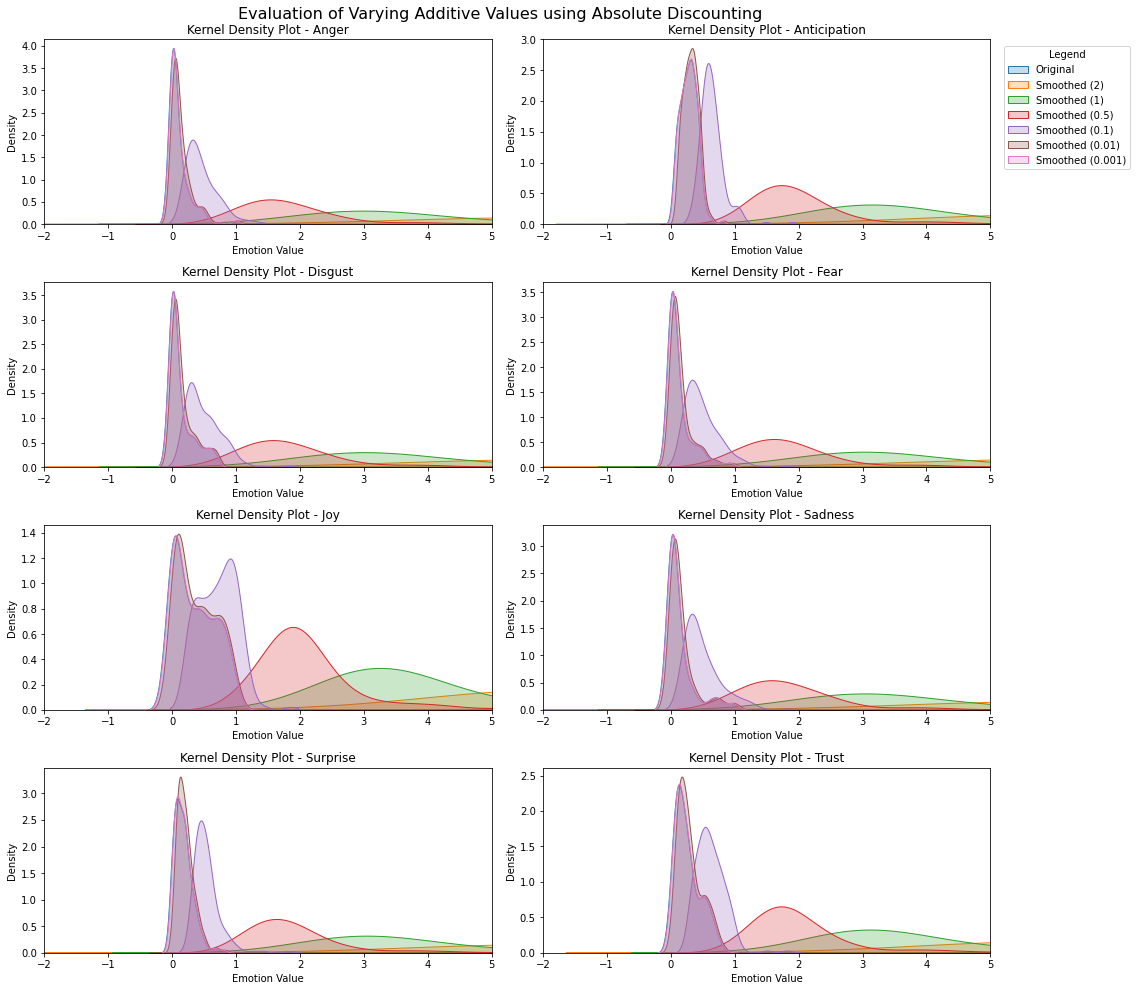

In [50]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_ad_r2[emotion_column], label="Smoothed (2)", shade=True, ax=ax)
    sns.kdeplot(data=df_ad_r1[emotion_column], label="Smoothed (1)", shade=True, ax=ax)
    sns.kdeplot(data=df_ad_r05[emotion_column], label="Smoothed (0.5)", shade=True, ax=ax)
    sns.kdeplot(data=df_ad_r01[emotion_column], label="Smoothed (0.1)", shade=True, ax=ax)
    sns.kdeplot(data=df_ad_r001[emotion_column], label="Smoothed (0.01)", shade=True, ax=ax)
    sns.kdeplot(data=df_ad_r0001[emotion_column], label="Smoothed (0.001)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Absolute Discounting", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-2, 5)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

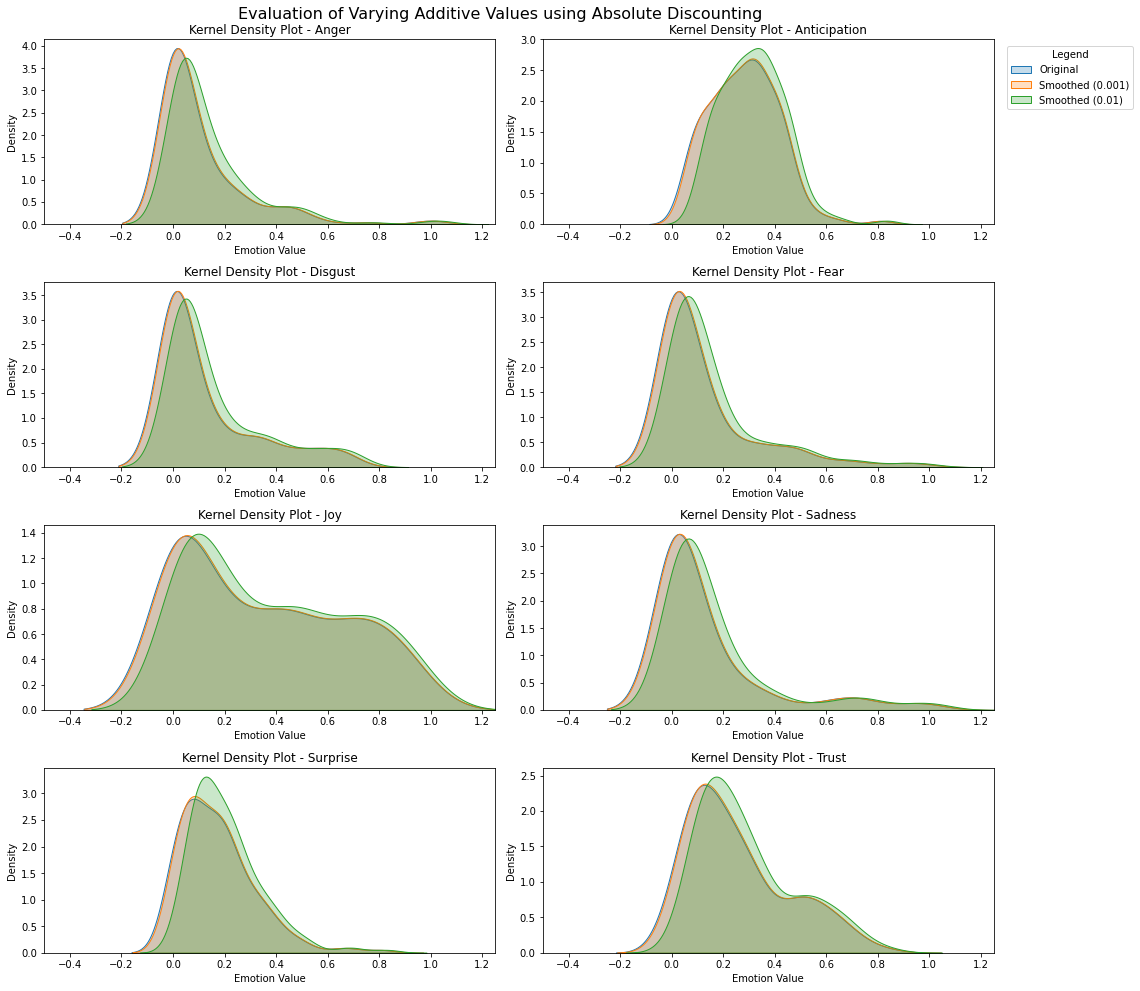

In [51]:
#Set subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, emotion_column in enumerate(emotion_columns):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df[emotion_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_ad_r0001[emotion_column], label="Smoothed (0.001)", shade=True, ax=ax)
    sns.kdeplot(data=df_ad_r001[emotion_column], label="Smoothed (0.01)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Absolute Discounting", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + emotion_column.capitalize())
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")
    
    #Set x-axis range
    ax.set_xlim(-0.5, 1.25)

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 4.9), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

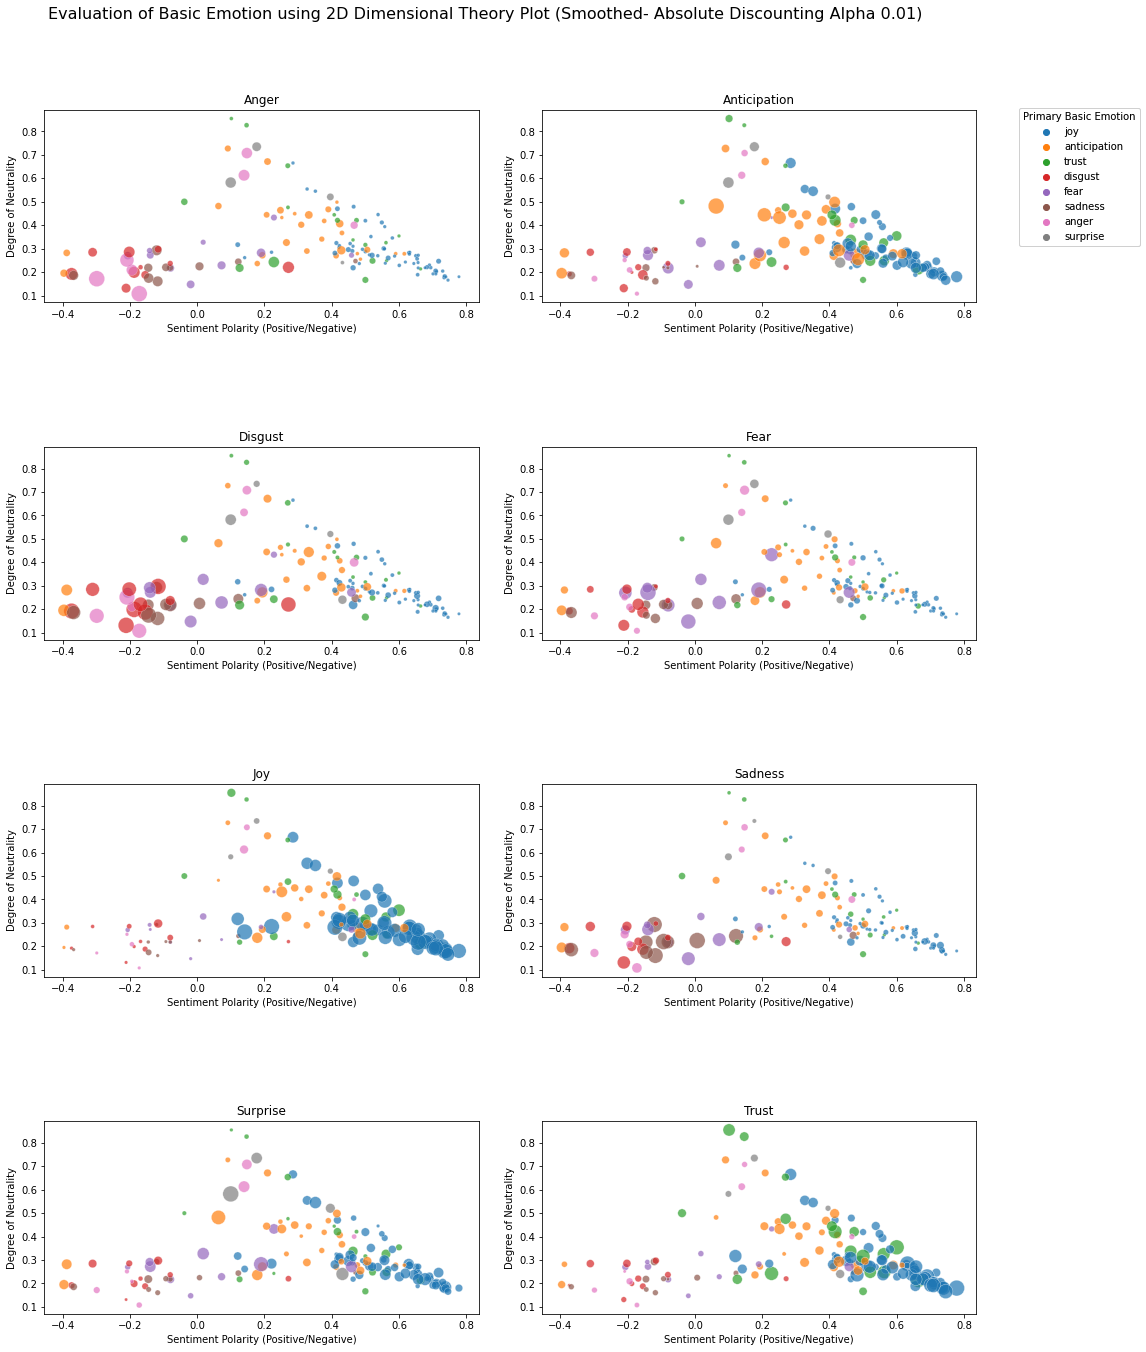

In [72]:
#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_ad_r001['sent_score']
    y = df_ad_r001['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_ad_r001[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_ad_r001['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion using 2D Dimensional Theory Plot (Smoothed- Absolute Discounting Alpha 0.01)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Sentiment Polarity (Positive/Negative)')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  # Only include specified emotions in the legend
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

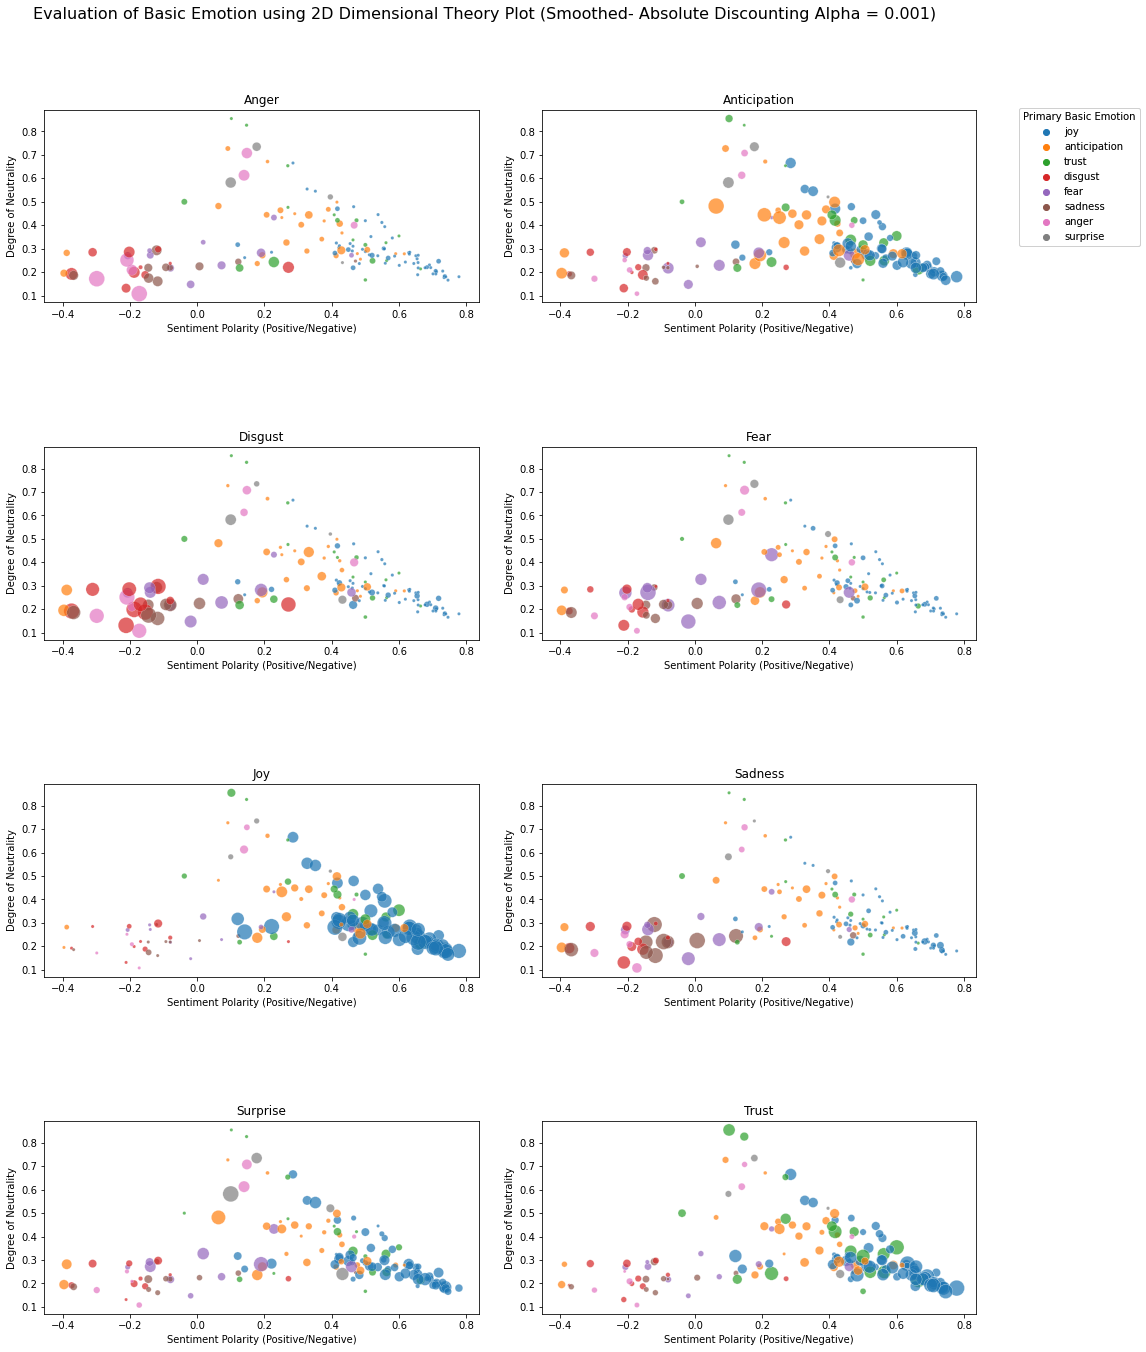

In [73]:
#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_ad_r0001['sent_score']
    y = df_ad_r0001['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_ad_r0001[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_ad_r0001['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion using 2D Dimensional Theory Plot (Smoothed- Absolute Discounting Alpha = 0.001)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Sentiment Polarity (Positive/Negative)')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  # Only include specified emotions in the legend
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

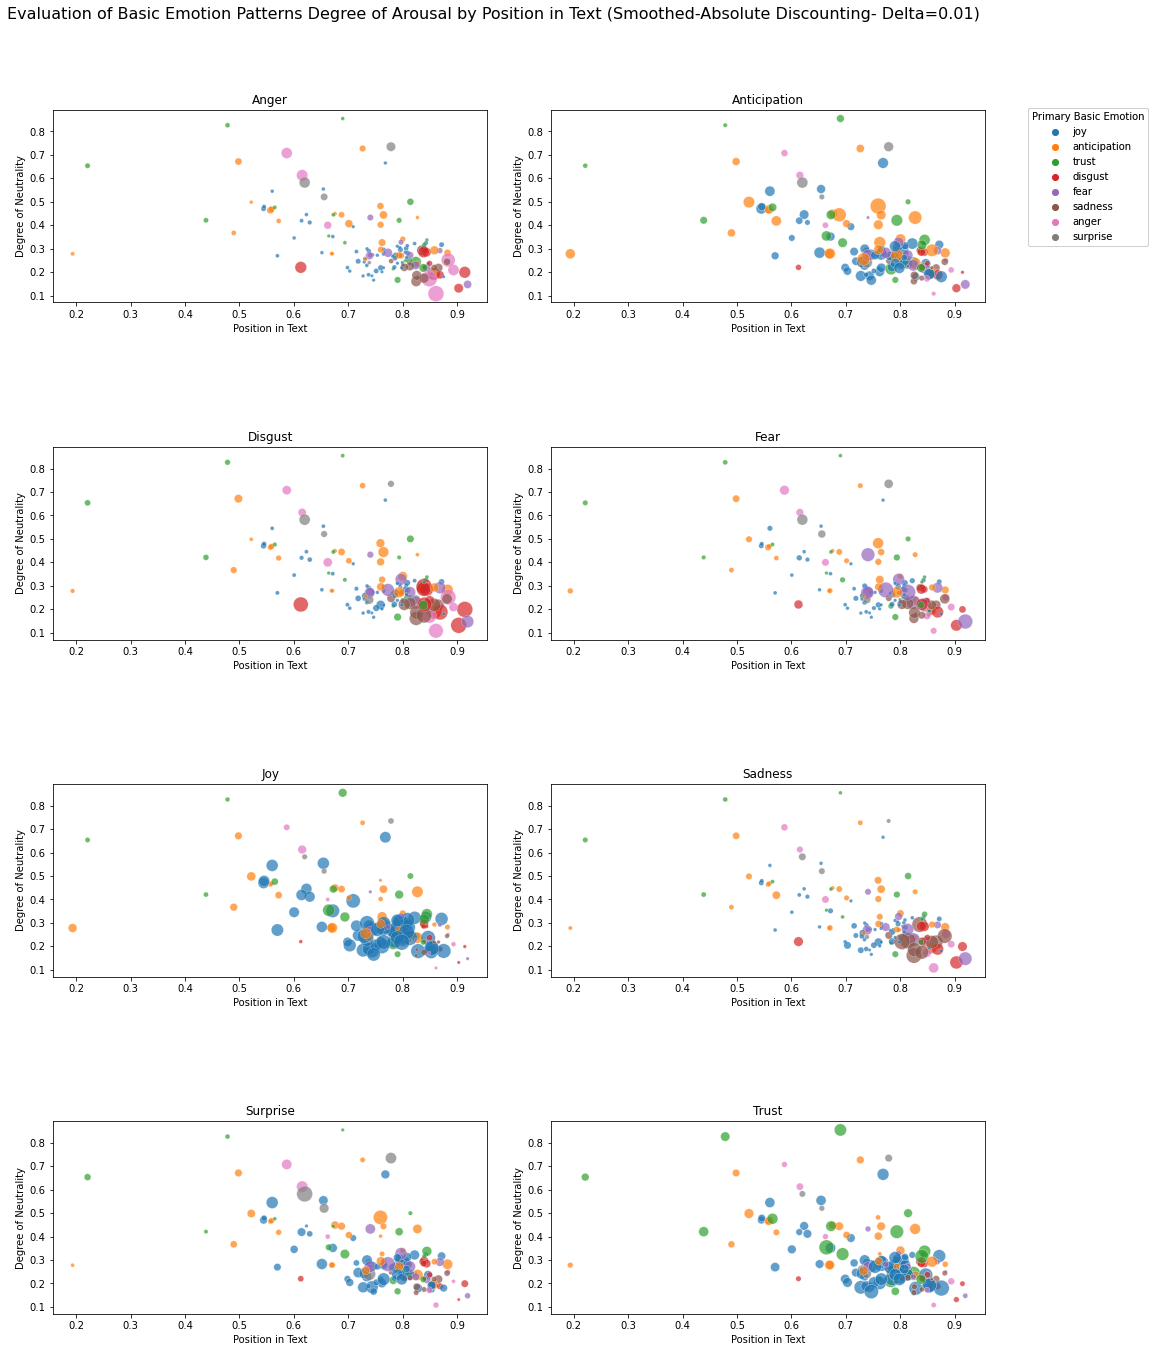

In [70]:
#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_ad_r001['Position']
    y = df_ad_r001['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_ad_r001[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_ad_r001['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion Patterns Degree of Arousal by Position in Text (Smoothed-Absolute Discounting- Delta=0.01)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Position in Text')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  # Only include specified emotions in the legend
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

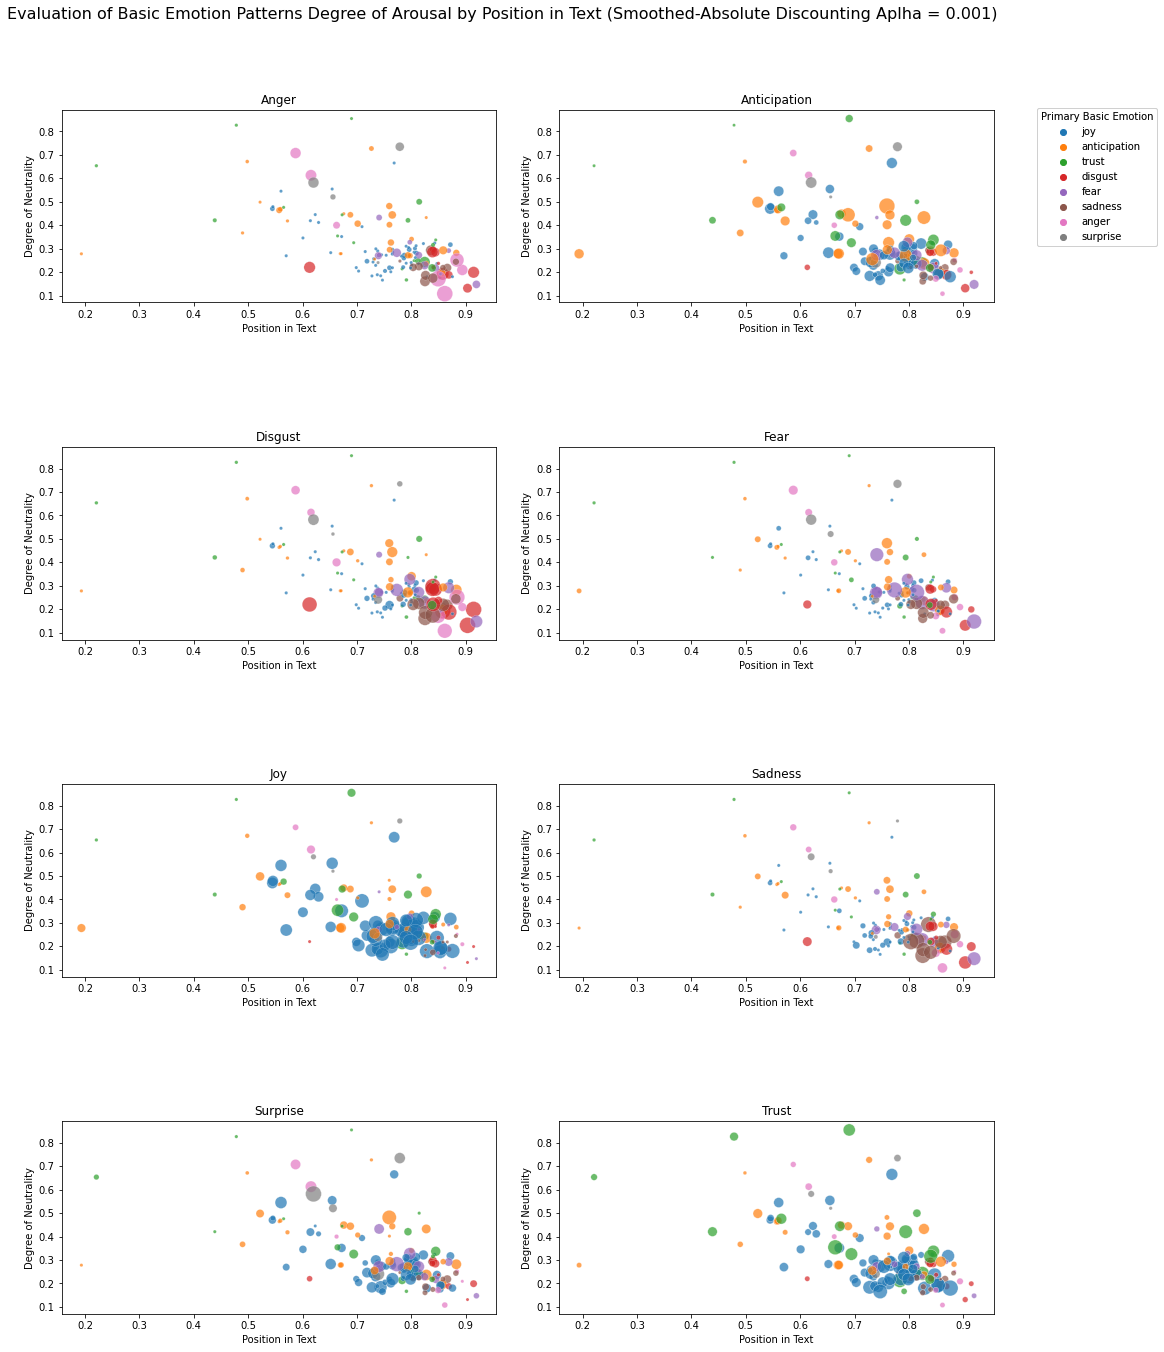

In [71]:
#Make a list of basic emotions
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

#Define plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

#Lists to store legend handles and labels
legend_handles_color = []
legend_labels_color = []

#Iterate over each emotion to define plot parameters
for emotion, ax in zip(emotions, axes.flatten()):
    x = df_ad_r0001['Position']
    y = df_ad_r0001['le_0']

    #Make marker size proportional to the degree of affinity to that emotion
    marker_size = df_ad_r0001[emotion] * 25

    #Create the scatter plot with hue as primary basic emotion
    sns.scatterplot(x=x, y=y, hue=df_ad_r0001['primary_basic_emot'], size=marker_size, sizes=(10, 250), alpha=0.7, ax=ax)

    #Set the title for each subplot
    ax.set_title(emotion.capitalize())

    #Add overall title
    fig.suptitle("Evaluation of Basic Emotion Patterns Degree of Arousal by Position in Text (Smoothed-Absolute Discounting Aplha = 0.001)", fontsize=16)

    #Set axis labels
    ax.set_xlabel('Position in Text')
    ax.set_ylabel('Degree of Neutrality')

    #Get the handles and labels for the color legend and add them to the lists
    handles_color, labels_color = ax.get_legend_handles_labels()
    legend_handles_color.extend(handles_color)
    legend_labels_color.extend(labels_color)

    #Remove size legend
    ax.get_legend().remove()

#Remove duplicates from the color legend
unique_handles_color, unique_labels_color = [], []
for handle_color, label_color in zip(legend_handles_color, legend_labels_color):
    if label_color in emotions and label_color not in unique_labels_color:  # Only include specified emotions in the legend
        unique_handles_color.append(handle_color)
        unique_labels_color.append(label_color)

#Create a custom color legend with only specified emotions labels
color_legend = fig.legend(handles=unique_handles_color, labels=unique_labels_color, bbox_to_anchor=(1.03, 0.91), loc='upper left', borderaxespad=0., title="Primary Basic Emotion")

#Add the color legend to the plot
fig.add_artist(color_legend)

#Adjust spacing between subplots
plt.tight_layout()

#Define plot size
plt.gcf().set_size_inches(14, 20)

#Display the plot
plt.show()

# Dimensional Theory- Laplace Estimator

The Laplace Estimator will be evaluated similarly to the previous methodology employed for the basic theory evaluation here. The purpose of this work is to determine a method which results in non-zero probabilities and enables appropriate balance between generalisation in machine learning while retaining the ability to capture nuance from within the data. 

In [59]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from numpy import log
import plotly.express as px

In [60]:
#Importing data
df = pd.read_csv("Emoji_Sentiment_Data.csv")
df.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block  
0               FACE WITH TEARS OF JOY              Emoticons  
1                    HEAVY BLACK HEART               Dingbats  
2                     BLACK HEART SUIT  Miscellaneous Symbols  
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  
4                   LOUDLY CRYING FACE              Emoticons

In [61]:
#Generate relative frequency estimates for comparative purposes

#Make a copy of the data
df_orig = df.copy()

df_orig['le_+'] = df_orig['Positive'] / df_orig['Occurrences']
df_orig['le_-'] = df_orig['Negative'] / df_orig['Occurrences']
df_orig['le_0'] = df_orig['Neutral'] / df_orig['Occurrences']

df_orig.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468130   
1                    HEAVY BLACK HEART               Dingbats  0.790186   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692889   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729674   
4                   LOUDLY CRYING FACE              Emoticons  0.343105   

       le_-      le_0  
0  0.247162  0.284708  
1  0.044099  0.165714  
2  0.035274  0.271837  
3  0.051738  0.218588  
4  0.436482  0.220413

In [62]:
#Make a copy of the data
df_le2 = df.copy()

#Use Laplace estimator to determine probability distribution
df_le2['le_+'] = (df_le2['Positive'] + 2) / (df_le2['Occurrences'] + 3)
df_le2['le_-'] = (df_le2['Negative'] + 2) / (df_le2['Occurrences'] + 3)
df_le2['le_0'] = (df_le2['Neutral'] + 2) / (df_le2['Occurrences'] + 3)

df_le2.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468171   
1                    HEAVY BLACK HEART               Dingbats  0.790140   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692878   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729645   
4                   LOUDLY CRYING FACE              Emoticons  0.343281   

       le_-      le_0  
0  0.247248  0.284786  
1  0.044331  0.165901  
2  0.035539  0.272002  
3  0.052028  0.218799  
4  0.436607  0.220655

In [63]:
#Make a copy of the data
df_le1 = df.copy()

#Use Laplace estimator to determine probability distribution
df_le1['le_+'] = (df_le1['Positive'] + 1) / (df_le1['Occurrences'] + 3)
df_le1['le_-'] = (df_le1['Negative'] + 1) / (df_le1['Occurrences'] + 3)
df_le1['le_0'] = (df_le1['Neutral'] + 1) / (df_le1['Occurrences'] + 3)

df_le1.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468103   
1                    HEAVY BLACK HEART               Dingbats  0.790016   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692738   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729488   
4                   LOUDLY CRYING FACE              Emoticons  0.343100   

       le_-      le_0  
0  0.247179  0.284718  
1  0.044207  0.165777  
2  0.035399  0.271862  
3  0.051870  0.218642  
4  0.436426  0.220474

In [64]:
#Make a copy of the data
df_le05 = df.copy()

#Use Laplace estimator to determine probability distribution
df_le05['le_+'] = (df_le05['Positive'] + 0.5) / (df_le05['Occurrences'] + 3)
df_le05['le_-'] = (df_le05['Negative'] + 0.5) / (df_le05['Occurrences'] + 3)
df_le05['le_0'] = (df_le05['Neutral'] + 0.5) / (df_le05['Occurrences'] + 3)

df_le05.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468068   
1                    HEAVY BLACK HEART               Dingbats  0.789954   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692668   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729409   
4                   LOUDLY CRYING FACE              Emoticons  0.343010   

       le_-      le_0  
0  0.247145  0.284684  
1  0.044145  0.165715  
2  0.035330  0.271792  
3  0.051792  0.218563  
4  0.436336  0.220383

In [65]:
#Make a copy of the data
df_le01 = df.copy()

#Use Laplace estimator to determine probability distribution
df_le01['le_+'] = (df_le01['Positive'] + 0.1) / (df_le01['Occurrences'] + 3)
df_le01['le_-'] = (df_le01['Negative'] + 0.1) / (df_le01['Occurrences'] + 3)
df_le01['le_0'] = (df_le01['Neutral'] + 0.1) / (df_le01['Occurrences'] + 3)

df_le01.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468041   
1                    HEAVY BLACK HEART               Dingbats  0.789904   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692612   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729346   
4                   LOUDLY CRYING FACE              Emoticons  0.342937   

       le_-      le_0  
0  0.247118  0.284656  
1  0.044095  0.165665  
2  0.035274  0.271736  
3  0.051729  0.218500  
4  0.436263  0.220311

In [66]:
#Make a copy of the data
df_le001 = df.copy()

#Use Laplace estimator to determine probability distribution
df_le001['le_+'] = (df_le001['Positive'] + 0.01) / (df_le001['Occurrences'] + 3)
df_le001['le_-'] = (df_le001['Negative'] + 0.01) / (df_le001['Occurrences'] + 3)
df_le001['le_0'] = (df_le001['Neutral'] + 0.01) / (df_le001['Occurrences'] + 3)

df_le001.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468035   
1                    HEAVY BLACK HEART               Dingbats  0.789893   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692600   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729332   
4                   LOUDLY CRYING FACE              Emoticons  0.342921   

       le_-      le_0  
0  0.247112  0.284650  
1  0.044084  0.165654  
2  0.035261  0.271724  
3  0.051715  0.218486  
4  0.436247  0.220295

In [67]:
#Make a copy of the data
df_le0001 = df.copy()

#Use Laplace estimator to determine probability distribution 
df_le0001['le_+'] = (df_le0001['Positive'] + 0.001) / (df_le0001['Occurrences'] + 3)
df_le0001['le_-'] = (df_le0001['Negative'] + 0.001) / (df_le0001['Occurrences'] + 3)
df_le0001['le_0'] = (df_le0001['Neutral'] + 0.001) / (df_le0001['Occurrences'] + 3)

df_le0001.head()

Emoji Unicode codepoint  Occurrences  Position  Negative  Neutral  Positive  \
0     😂           0x1f602        14622  0.805101      3614     4163      6845   
1     ❤            0x2764         8050  0.746943       355     1334      6361   
2     ♥            0x2665         7144  0.753806       252     1942      4950   
3     😍           0x1f60d         6359  0.765292       329     1390      4640   
4     😭           0x1f62d         5526  0.803352      2412     1218      1896   

                          Unicode name          Unicode block      le_+  \
0               FACE WITH TEARS OF JOY              Emoticons  0.468034   
1                    HEAVY BLACK HEART               Dingbats  0.789892   
2                     BLACK HEART SUIT  Miscellaneous Symbols  0.692598   
3  SMILING FACE WITH HEART-SHAPED EYES              Emoticons  0.729331   
4                   LOUDLY CRYING FACE              Emoticons  0.342919   

       le_-      le_0  
0  0.247111  0.284650  
1  0.044083  0.165653  
2  0.035260  0.271723  
3  0.051713  0.218485  
4  0.436245  0.220293

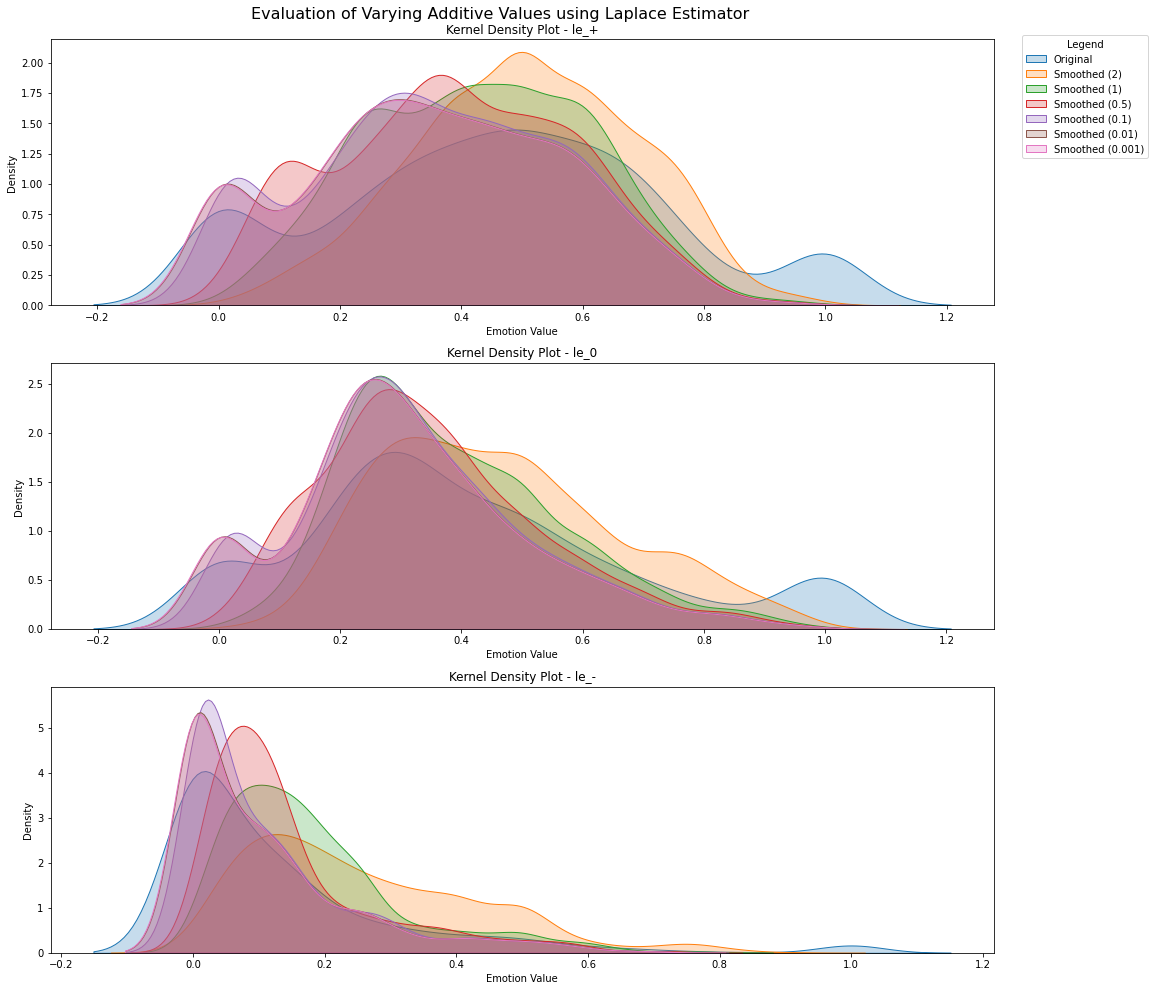

In [68]:
#Create list of sentiment classes
sentiment_class = ["le_+", 'le_0', 'le_-']

#Set subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, sent_column in enumerate(sentiment_class):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df_orig[sent_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le2[sent_column], label="Smoothed (2)", shade=True, ax=ax)
    sns.kdeplot(data=df_le1[sent_column], label="Smoothed (1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le05[sent_column], label="Smoothed (0.5)", shade=True, ax=ax)
    sns.kdeplot(data=df_le01[sent_column], label="Smoothed (0.1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le001[sent_column], label="Smoothed (0.01)", shade=True, ax=ax)
    sns.kdeplot(data=df_le0001[sent_column], label="Smoothed (0.001)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + sent_column)
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 3.45), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()

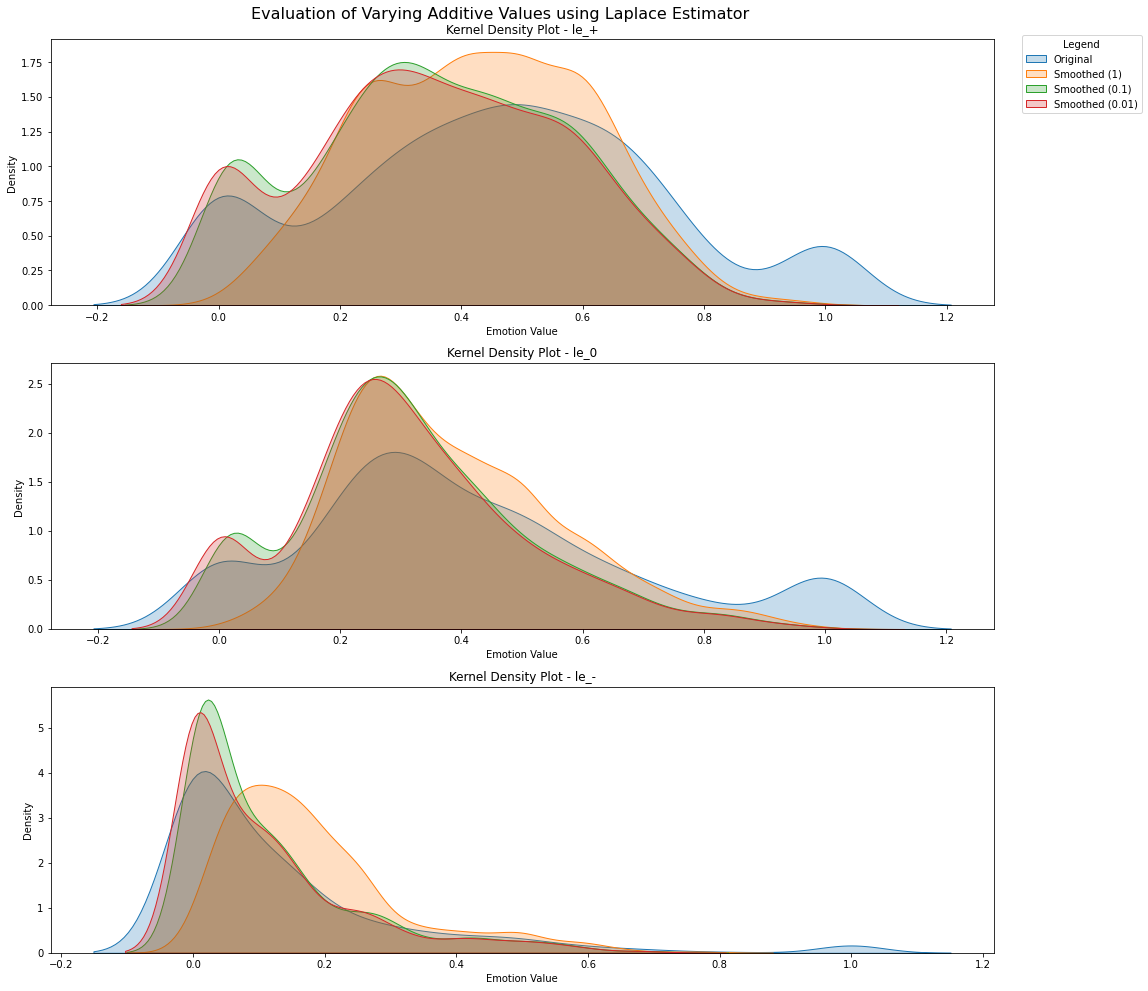

In [69]:
#Create list of sentiment classes
sentiment_class = ["le_+", 'le_0', 'le_-']

#Set subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 14))

#Flatten axis array
axes = axes.flatten()

#Iterate over the emotion columns create kernel density plots for original data and smoothed data
for i, sent_column in enumerate(sentiment_class):
    ax = axes[i]
    
    #Create the kernel density plot for the original data
    sns.kdeplot(data=df_orig[sent_column], label="Original", shade=True, ax=ax)
    #Create the kernel density plot for the smoothed data- for each additive value used
    sns.kdeplot(data=df_le1[sent_column], label="Smoothed (1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le01[sent_column], label="Smoothed (0.1)", shade=True, ax=ax)
    sns.kdeplot(data=df_le001[sent_column], label="Smoothed (0.01)", shade=True, ax=ax)
    
    #Add overall title
    fig.suptitle("Evaluation of Varying Additive Values using Laplace Estimator", fontsize=16)
    
    #Set subplot title and axis labels
    ax.set_title("Kernel Density Plot - " + sent_column)
    ax.set_xlabel("Emotion Value")
    ax.set_ylabel("Density")

#Adjust the spacing between subplots
plt.tight_layout()

#Display the legend and adjust positioning
plt.legend(bbox_to_anchor=(1.03, 3.45), loc='upper left', borderaxespad=0., title="Legend")

#Display the plots
plt.show()